## Problem Statement<a href="#Problem-Statement" class="anchor-link">¶</a>

### Business Context<a href="#Business-Context" class="anchor-link">¶</a>

The Thera bank recently saw a steep decline in the number of users of
their credit card, credit cards are a good source of income for banks
because of different kinds of fees charged by the banks like annual
fees, balance transfer fees, and cash advance fees, late payment fees,
foreign transaction fees, and others. Some fees are charged to every
user irrespective of usage, while others are charged under specified
circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the
bank wants to analyze the data of customers and identify the customers
who will leave their credit card services and reason for same – so that
bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a
classification model that will help the bank improve its services so
that customers do not renounce their credit cards

### Data Description<a href="#Data-Description" class="anchor-link">¶</a>

-   CLIENTNUM: Client number. Unique identifier for the customer holding
    the account
-   Attrition_Flag: Internal event (customer activity) variable - if the
    account is closed then "Attrited Customer" else "Existing Customer"
-   Customer_Age: Age in Years
-   Gender: Gender of the account holder
-   Dependent_count: Number of dependents
-   Education_Level: Educational Qualification of the account holder -
    Graduate, High School, Unknown, Uneducated, College(refers to
    college student), Post-Graduate, Doctorate
-   Marital_Status: Marital Status of the account holder
-   Income_Category: Annual Income Category of the account holder
-   Card_Category: Type of Card
-   Months_on_book: Period of relationship with the bank (in months)
-   Total_Relationship_Count: Total no. of products held by the customer
-   Months_Inactive_12_mon: No. of months inactive in the last 12 months
-   Contacts_Count_12_mon: No. of Contacts in the last 12 months
-   Credit_Limit: Credit Limit on the Credit Card
-   Total_Revolving_Bal: Total Revolving Balance on the Credit Card
-   Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
-   Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
-   Total_Trans_Amt: Total Transaction Amount (Last 12 months)
-   Total_Trans_Ct: Total Transaction Count (Last 12 months)
-   Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
-   Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?<a href="#What-Is-a-Revolving-Balance?" class="anchor-link">¶</a>

-   If we don't pay the balance of the revolving credit account in full
    every month, the unpaid portion carries over to the next month.
    That's called a revolving balance

##### What is the Average Open to buy?<a href="#What-is-the-Average-Open-to-buy?" class="anchor-link">¶</a>

-   'Open to Buy' means the amount left on your credit card to use. Now,
    this column represents the average of this value for the last 12
    months.

##### What is the Average utilization Ratio?<a href="#What-is-the-Average-utilization-Ratio?"
class="anchor-link">¶</a>

-   The Avg_Utilization_Ratio represents how much of the available
    credit the customer spent. This is useful for calculating credit
    scores.

##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:<a
href="#Relation-b/w-Avg_Open_To_Buy,-Credit_Limit-and-Avg_Utilization_Ratio:"
class="anchor-link">¶</a>

-   ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries<a href="#Importing-necessary-libraries" class="anchor-link">¶</a>

In \[1\]:

    # This will help in making the Python code more structured automatically (good coding practice)
    # %load_ext nb_black

    # Libraries to help with reading and manipulating data
    import pandas as pd
    import numpy as np

    # Libaries to help with data visualization
    import matplotlib.pyplot as plt
    import seaborn as sns

    # To tune model, get different metric scores, and split data
    from sklearn import metrics
    from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
    from sklearn.metrics import (
        f1_score,
        accuracy_score,
        recall_score,
        precision_score,
        confusion_matrix,
        roc_auc_score,

    )
    from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

    # To be used for data scaling and one hot encoding
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

    # To impute missing values
    from sklearn.impute import SimpleImputer

    # To oversample and undersample data
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler

    # To do hyperparameter tuning
    from sklearn.model_selection import RandomizedSearchCV

    # To be used for creating pipelines and personalizing them
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer

    # To define maximum number of columns to be displayed in a dataframe
    pd.set_option("display.max_columns", None)

    # To supress scientific notations for a dataframe
    pd.set_option("display.float_format", lambda x: "%.3f" % x)

    # To help with model building
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import (
        AdaBoostClassifier,
        GradientBoostingClassifier,
        RandomForestClassifier,
        BaggingClassifier,
    )
    from xgboost import XGBClassifier

    # To suppress scientific notations
    pd.set_option("display.float_format", lambda x: "%.3f" % x)

    # To supress warnings
    import warnings

    warnings.filterwarnings("ignore")

## Loading the dataset<a href="#Loading-the-dataset" class="anchor-link">¶</a>

In \[2\]:

    from google.colab import drive
    drive.mount('/content/drive')

    Mounted at /content/drive

In \[3\]:

    churn = pd.read_csv(('/content/drive/MyDrive/BankChurners.csv'))

## Data Overview<a href="#Data-Overview" class="anchor-link">¶</a>

The initial steps to get an overview of any dataset is to:

-   observe the first few rows of the dataset, to check whether the
    dataset has been loaded properly or not
-   get information about the number of rows and columns in the dataset
-   find out the data types of the columns to ensure that data is stored
    in the preferred format and the value of each property is as
    expected.
-   check the statistical summary of the dataset to get an overview of
    the numerical columns of the data

### Checking the shape of the dataset<a href="#Checking-the-shape-of-the-dataset" class="anchor-link">¶</a>

In \[4\]:

    # Checking the number of rows and columns in the training data
    churn.info() ##  Complete the code to view dimensions of the train data

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 10127 entries, 0 to 10126
    Data columns (total 21 columns):
     #   Column                    Non-Null Count  Dtype  
    ---  ------                    --------------  -----  
     0   CLIENTNUM                 10127 non-null  int64  
     1   Attrition_Flag            10127 non-null  object 
     2   Customer_Age              10127 non-null  int64  
     3   Gender                    10127 non-null  object 
     4   Dependent_count           10127 non-null  int64  
     5   Education_Level           8608 non-null   object 
     6   Marital_Status            9378 non-null   object 
     7   Income_Category           10127 non-null  object 
     8   Card_Category             10127 non-null  object 
     9   Months_on_book            10127 non-null  int64  
     10  Total_Relationship_Count  10127 non-null  int64  
     11  Months_Inactive_12_mon    10127 non-null  int64  
     12  Contacts_Count_12_mon     10127 non-null  int64  
     13  Credit_Limit              10127 non-null  float64
     14  Total_Revolving_Bal       10127 non-null  int64  
     15  Avg_Open_To_Buy           10127 non-null  float64
     16  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
     17  Total_Trans_Amt           10127 non-null  int64  
     18  Total_Trans_Ct            10127 non-null  int64  
     19  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
     20  Avg_Utilization_Ratio     10127 non-null  float64
    dtypes: float64(5), int64(10), object(6)
    memory usage: 1.6+ MB

In \[5\]:

    churn.shape

Out\[5\]:

    (10127, 21)

the data has 21 column and 10127 rows

In \[6\]:

    # let's create a copy of the data
    data = churn.copy()

### Displaying the first few rows of the dataset<a href="#Displaying-the-first-few-rows-of-the-dataset"
class="anchor-link">¶</a>

In \[7\]:

    # let's view the first 5 rows of the data
    data.head ##  Complete the code to view top 5 rows of the data

Out\[7\]:

    <bound method NDFrame.head of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
    0      768805383  Existing Customer            45      M                3   
    1      818770008  Existing Customer            49      F                5   
    2      713982108  Existing Customer            51      M                3   
    3      769911858  Existing Customer            40      F                4   
    4      709106358  Existing Customer            40      M                3   
    ...          ...                ...           ...    ...              ...   
    10122  772366833  Existing Customer            50      M                2   
    10123  710638233  Attrited Customer            41      M                2   
    10124  716506083  Attrited Customer            44      F                1   
    10125  717406983  Attrited Customer            30      M                2   
    10126  714337233  Attrited Customer            43      F                2   

          Education_Level Marital_Status Income_Category Card_Category  \
    0         High School        Married     $60K - $80K          Blue   
    1            Graduate         Single  Less than $40K          Blue   
    2            Graduate        Married    $80K - $120K          Blue   
    3         High School            NaN  Less than $40K          Blue   
    4          Uneducated        Married     $60K - $80K          Blue   
    ...               ...            ...             ...           ...   
    10122        Graduate         Single     $40K - $60K          Blue   
    10123             NaN       Divorced     $40K - $60K          Blue   
    10124     High School        Married  Less than $40K          Blue   
    10125        Graduate            NaN     $40K - $60K          Blue   
    10126        Graduate        Married  Less than $40K        Silver   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
    0                  39                         5                       1   
    1                  44                         6                       1   
    2                  36                         4                       1   
    3                  34                         3                       4   
    4                  21                         5                       1   
    ...               ...                       ...                     ...   
    10122              40                         3                       2   
    10123              25                         4                       2   
    10124              36                         5                       3   
    10125              36                         4                       3   
    10126              25                         6                       2   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
    0                          3     12691.000                  777   
    1                          2      8256.000                  864   
    2                          0      3418.000                    0   
    3                          1      3313.000                 2517   
    4                          0      4716.000                    0   
    ...                      ...           ...                  ...   
    10122                      3      4003.000                 1851   
    10123                      3      4277.000                 2186   
    10124                      4      5409.000                    0   
    10125                      3      5281.000                    0   
    10126                      4     10388.000                 1961   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
    0            11914.000                 1.335             1144              42   
    1             7392.000                 1.541             1291              33   
    2             3418.000                 2.594             1887              20   
    3              796.000                 1.405             1171              20   
    4             4716.000                 2.175              816              28   
    ...                ...                   ...              ...             ...   
    10122         2152.000                 0.703            15476             117   
    10123         2091.000                 0.804             8764              69   
    10124         5409.000                 0.819            10291              60   
    10125         5281.000                 0.535             8395              62   
    10126         8427.000                 0.703            10294              61   

           Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
    0                    1.625                  0.061  
    1                    3.714                  0.105  
    2                    2.333                  0.000  
    3                    2.333                  0.760  
    4                    2.500                  0.000  
    ...                    ...                    ...  
    10122                0.857                  0.462  
    10123                0.683                  0.511  
    10124                0.818                  0.000  
    10125                0.722                  0.000  
    10126                0.649                  0.189  

    [10127 rows x 21 columns]>

In \[8\]:

    # let's view the last 5 rows of the data
    data.tail ##  Complete the code to view last 5 rows of the data

Out\[8\]:

    <bound method NDFrame.tail of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
    0      768805383  Existing Customer            45      M                3   
    1      818770008  Existing Customer            49      F                5   
    2      713982108  Existing Customer            51      M                3   
    3      769911858  Existing Customer            40      F                4   
    4      709106358  Existing Customer            40      M                3   
    ...          ...                ...           ...    ...              ...   
    10122  772366833  Existing Customer            50      M                2   
    10123  710638233  Attrited Customer            41      M                2   
    10124  716506083  Attrited Customer            44      F                1   
    10125  717406983  Attrited Customer            30      M                2   
    10126  714337233  Attrited Customer            43      F                2   

          Education_Level Marital_Status Income_Category Card_Category  \
    0         High School        Married     $60K - $80K          Blue   
    1            Graduate         Single  Less than $40K          Blue   
    2            Graduate        Married    $80K - $120K          Blue   
    3         High School            NaN  Less than $40K          Blue   
    4          Uneducated        Married     $60K - $80K          Blue   
    ...               ...            ...             ...           ...   
    10122        Graduate         Single     $40K - $60K          Blue   
    10123             NaN       Divorced     $40K - $60K          Blue   
    10124     High School        Married  Less than $40K          Blue   
    10125        Graduate            NaN     $40K - $60K          Blue   
    10126        Graduate        Married  Less than $40K        Silver   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
    0                  39                         5                       1   
    1                  44                         6                       1   
    2                  36                         4                       1   
    3                  34                         3                       4   
    4                  21                         5                       1   
    ...               ...                       ...                     ...   
    10122              40                         3                       2   
    10123              25                         4                       2   
    10124              36                         5                       3   
    10125              36                         4                       3   
    10126              25                         6                       2   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
    0                          3     12691.000                  777   
    1                          2      8256.000                  864   
    2                          0      3418.000                    0   
    3                          1      3313.000                 2517   
    4                          0      4716.000                    0   
    ...                      ...           ...                  ...   
    10122                      3      4003.000                 1851   
    10123                      3      4277.000                 2186   
    10124                      4      5409.000                    0   
    10125                      3      5281.000                    0   
    10126                      4     10388.000                 1961   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
    0            11914.000                 1.335             1144              42   
    1             7392.000                 1.541             1291              33   
    2             3418.000                 2.594             1887              20   
    3              796.000                 1.405             1171              20   
    4             4716.000                 2.175              816              28   
    ...                ...                   ...              ...             ...   
    10122         2152.000                 0.703            15476             117   
    10123         2091.000                 0.804             8764              69   
    10124         5409.000                 0.819            10291              60   
    10125         5281.000                 0.535             8395              62   
    10126         8427.000                 0.703            10294              61   

           Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
    0                    1.625                  0.061  
    1                    3.714                  0.105  
    2                    2.333                  0.000  
    3                    2.333                  0.760  
    4                    2.500                  0.000  
    ...                    ...                    ...  
    10122                0.857                  0.462  
    10123                0.683                  0.511  
    10124                0.818                  0.000  
    10125                0.722                  0.000  
    10126                0.649                  0.189  

    [10127 rows x 21 columns]>

### Checking the data types of the columns for the dataset<a href="#Checking-the-data-types-of-the-columns-for-the-dataset"
class="anchor-link">¶</a>

In \[9\]:

    # let's check the data types of the columns in the dataset
    data.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 10127 entries, 0 to 10126
    Data columns (total 21 columns):
     #   Column                    Non-Null Count  Dtype  
    ---  ------                    --------------  -----  
     0   CLIENTNUM                 10127 non-null  int64  
     1   Attrition_Flag            10127 non-null  object 
     2   Customer_Age              10127 non-null  int64  
     3   Gender                    10127 non-null  object 
     4   Dependent_count           10127 non-null  int64  
     5   Education_Level           8608 non-null   object 
     6   Marital_Status            9378 non-null   object 
     7   Income_Category           10127 non-null  object 
     8   Card_Category             10127 non-null  object 
     9   Months_on_book            10127 non-null  int64  
     10  Total_Relationship_Count  10127 non-null  int64  
     11  Months_Inactive_12_mon    10127 non-null  int64  
     12  Contacts_Count_12_mon     10127 non-null  int64  
     13  Credit_Limit              10127 non-null  float64
     14  Total_Revolving_Bal       10127 non-null  int64  
     15  Avg_Open_To_Buy           10127 non-null  float64
     16  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
     17  Total_Trans_Amt           10127 non-null  int64  
     18  Total_Trans_Ct            10127 non-null  int64  
     19  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
     20  Avg_Utilization_Ratio     10127 non-null  float64
    dtypes: float64(5), int64(10), object(6)
    memory usage: 1.6+ MB

the data consist of 10 int, 6 object, 5 float of datatype

### Checking for duplicate values<a href="#Checking-for-duplicate-values" class="anchor-link">¶</a>

In \[10\]:

    # let's check for duplicate values in the data
    data.duplicated().sum ##  Complete the code to check duplicate entries in the data

Out\[10\]:

    <bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
    1        False
    2        False
    3        False
    4        False
             ...  
    10122    False
    10123    False
    10124    False
    10125    False
    10126    False
    Length: 10127, dtype: bool>

there are no duplicata in the dataframe

### Checking for missing values<a href="#Checking-for-missing-values" class="anchor-link">¶</a>

In \[11\]:

    # let's check for missing values in the data
    data.isnull().sum ##  Complete the code to check missing entries in the train data

Out\[11\]:

    <bound method NDFrame._add_numeric_operations.<locals>.sum of        CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
    0          False           False         False   False            False   
    1          False           False         False   False            False   
    2          False           False         False   False            False   
    3          False           False         False   False            False   
    4          False           False         False   False            False   
    ...          ...             ...           ...     ...              ...   
    10122      False           False         False   False            False   
    10123      False           False         False   False            False   
    10124      False           False         False   False            False   
    10125      False           False         False   False            False   
    10126      False           False         False   False            False   

           Education_Level  Marital_Status  Income_Category  Card_Category  \
    0                False           False            False          False   
    1                False           False            False          False   
    2                False           False            False          False   
    3                False            True            False          False   
    4                False           False            False          False   
    ...                ...             ...              ...            ...   
    10122            False           False            False          False   
    10123             True           False            False          False   
    10124            False           False            False          False   
    10125            False            True            False          False   
    10126            False           False            False          False   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
    0               False                     False                   False   
    1               False                     False                   False   
    2               False                     False                   False   
    3               False                     False                   False   
    4               False                     False                   False   
    ...               ...                       ...                     ...   
    10122           False                     False                   False   
    10123           False                     False                   False   
    10124           False                     False                   False   
    10125           False                     False                   False   
    10126           False                     False                   False   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
    0                      False         False                False   
    1                      False         False                False   
    2                      False         False                False   
    3                      False         False                False   
    4                      False         False                False   
    ...                      ...           ...                  ...   
    10122                  False         False                False   
    10123                  False         False                False   
    10124                  False         False                False   
    10125                  False         False                False   
    10126                  False         False                False   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
    0                False                 False            False           False   
    1                False                 False            False           False   
    2                False                 False            False           False   
    3                False                 False            False           False   
    4                False                 False            False           False   
    ...                ...                   ...              ...             ...   
    10122            False                 False            False           False   
    10123            False                 False            False           False   
    10124            False                 False            False           False   
    10125            False                 False            False           False   
    10126            False                 False            False           False   

           Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
    0                    False                  False  
    1                    False                  False  
    2                    False                  False  
    3                    False                  False  
    4                    False                  False  
    ...                    ...                    ...  
    10122                False                  False  
    10123                False                  False  
    10124                False                  False  
    10125                False                  False  
    10126                False                  False  

    [10127 rows x 21 columns]>

### Statistical summary of the dataset<a href="#Statistical-summary-of-the-dataset" class="anchor-link">¶</a>

In \[12\]:

    # let's view the statistical summary of the numerical columns in the data
    data.describe(include="all").T ##  Complete the code to print the statitical summary of the train data

Out\[12\]:

|                          | count     | unique | top               | freq | mean           | std          | min            | 25%            | 50%            | 75%            | max            |
|--------------------------|-----------|--------|-------------------|------|----------------|--------------|----------------|----------------|----------------|----------------|----------------|
| CLIENTNUM                | 10127.000 | NaN    | NaN               | NaN  | 739177606\.334 | 36903783.450 | 708082083\.000 | 713036770\.500 | 717926358\.000 | 773143533\.000 | 828343083\.000 |
| Attrition_Flag           | 10127     | 2      | Existing Customer | 8500 | NaN            | NaN          | NaN            | NaN            | NaN            | NaN            | NaN            |
| Customer_Age             | 10127.000 | NaN    | NaN               | NaN  | 46.326         | 8.017        | 26.000         | 41.000         | 46.000         | 52.000         | 73.000         |
| Gender                   | 10127     | 2      | F                 | 5358 | NaN            | NaN          | NaN            | NaN            | NaN            | NaN            | NaN            |
| Dependent_count          | 10127.000 | NaN    | NaN               | NaN  | 2.346          | 1.299        | 0.000          | 1.000          | 2.000          | 3.000          | 5.000          |
| Education_Level          | 8608      | 6      | Graduate          | 3128 | NaN            | NaN          | NaN            | NaN            | NaN            | NaN            | NaN            |
| Marital_Status           | 9378      | 3      | Married           | 4687 | NaN            | NaN          | NaN            | NaN            | NaN            | NaN            | NaN            |
| Income_Category          | 10127     | 6      | Less than \$40K   | 3561 | NaN            | NaN          | NaN            | NaN            | NaN            | NaN            | NaN            |
| Card_Category            | 10127     | 4      | Blue              | 9436 | NaN            | NaN          | NaN            | NaN            | NaN            | NaN            | NaN            |
| Months_on_book           | 10127.000 | NaN    | NaN               | NaN  | 35.928         | 7.986        | 13.000         | 31.000         | 36.000         | 40.000         | 56.000         |
| Total_Relationship_Count | 10127.000 | NaN    | NaN               | NaN  | 3.813          | 1.554        | 1.000          | 3.000          | 4.000          | 5.000          | 6.000          |
| Months_Inactive_12_mon   | 10127.000 | NaN    | NaN               | NaN  | 2.341          | 1.011        | 0.000          | 2.000          | 2.000          | 3.000          | 6.000          |
| Contacts_Count_12_mon    | 10127.000 | NaN    | NaN               | NaN  | 2.455          | 1.106        | 0.000          | 2.000          | 2.000          | 3.000          | 6.000          |
| Credit_Limit             | 10127.000 | NaN    | NaN               | NaN  | 8631.954       | 9088.777     | 1438.300       | 2555.000       | 4549.000       | 11067.500      | 34516.000      |
| Total_Revolving_Bal      | 10127.000 | NaN    | NaN               | NaN  | 1162.814       | 814.987      | 0.000          | 359.000        | 1276.000       | 1784.000       | 2517.000       |
| Avg_Open_To_Buy          | 10127.000 | NaN    | NaN               | NaN  | 7469.140       | 9090.685     | 3.000          | 1324.500       | 3474.000       | 9859.000       | 34516.000      |
| Total_Amt_Chng_Q4_Q1     | 10127.000 | NaN    | NaN               | NaN  | 0.760          | 0.219        | 0.000          | 0.631          | 0.736          | 0.859          | 3.397          |
| Total_Trans_Amt          | 10127.000 | NaN    | NaN               | NaN  | 4404.086       | 3397.129     | 510.000        | 2155.500       | 3899.000       | 4741.000       | 18484.000      |
| Total_Trans_Ct           | 10127.000 | NaN    | NaN               | NaN  | 64.859         | 23.473       | 10.000         | 45.000         | 67.000         | 81.000         | 139.000        |
| Total_Ct_Chng_Q4_Q1      | 10127.000 | NaN    | NaN               | NaN  | 0.712          | 0.238        | 0.000          | 0.582          | 0.702          | 0.818          | 3.714          |
| Avg_Utilization_Ratio    | 10127.000 | NaN    | NaN               | NaN  | 0.275          | 0.276        | 0.000          | 0.023          | 0.176          | 0.503          | 0.999          |





In \[13\]:

    data.describe(include=["object"]).T

Out\[13\]:

|                 | count | unique | top               | freq |
|-----------------|-------|--------|-------------------|------|
| Attrition_Flag  | 10127 | 2      | Existing Customer | 8500 |
| Gender          | 10127 | 2      | F                 | 5358 |
| Education_Level | 8608  | 6      | Graduate          | 3128 |
| Marital_Status  | 9378  | 3      | Married           | 4687 |
| Income_Category | 10127 | 6      | Less than \$40K   | 3561 |
| Card_Category   | 10127 | 4      | Blue              | 9436 |





In \[14\]:

    for i in data.describe(include=["object"]).columns:
        print("Unique values in", i, "are :")
        print(data[i].value_counts())
        print("*" * 50)

    Unique values in Attrition_Flag are :
    Existing Customer    8500
    Attrited Customer    1627
    Name: Attrition_Flag, dtype: int64
    **************************************************
    Unique values in Gender are :
    F    5358
    M    4769
    Name: Gender, dtype: int64
    **************************************************
    Unique values in Education_Level are :
    Graduate         3128
    High School      2013
    Uneducated       1487
    College          1013
    Post-Graduate     516
    Doctorate         451
    Name: Education_Level, dtype: int64
    **************************************************
    Unique values in Marital_Status are :
    Married     4687
    Single      3943
    Divorced     748
    Name: Marital_Status, dtype: int64
    **************************************************
    Unique values in Income_Category are :
    Less than $40K    3561
    $40K - $60K       1790
    $80K - $120K      1535
    $60K - $80K       1402
    abc               1112
    $120K +            727
    Name: Income_Category, dtype: int64
    **************************************************
    Unique values in Card_Category are :
    Blue        9436
    Silver       555
    Gold         116
    Platinum      20
    Name: Card_Category, dtype: int64
    **************************************************

In \[15\]:

    # CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
    data.drop(["CLIENTNUM"], axis=1, inplace=True)

In \[16\]:

    ## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
    data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
    data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis<a href="#Exploratory-Data-Analysis" class="anchor-link">¶</a>

#### The below functions need to be defined to carry out the Exploratory Data Analysis.<a
href="#The-below-functions-need-to-be-defined-to-carry-out-the-Exploratory-Data-Analysis."
class="anchor-link">¶</a>

In \[17\]:

    # function to plot a boxplot and a histogram along the same scale.


    def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
        """
        Boxplot and histogram combined

        data: dataframe
        feature: dataframe column
        figsize: size of figure (default (12,7))
        kde: whether to the show density curve (default False)
        bins: number of bins for histogram (default None)
        """
        f2, (ax_box2, ax_hist2) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize,
        )  # creating the 2 subplots
        sns.boxplot(
            data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
        )  # boxplot will be created and a triangle will indicate the mean value of the column
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        ) if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )  # For histogram
        ax_hist2.axvline(
            data[feature].mean(), color="green", linestyle="--"
        )  # Add mean to the histogram
        ax_hist2.axvline(
            data[feature].median(), color="black", linestyle="-"
        )  # Add median to the histogram

In \[18\]:

    # function to create labeled barplots


    def labeled_barplot(data, feature, perc=False, n=None):
        """
        Barplot with percentage at the top

        data: dataframe
        feature: dataframe column
        perc: whether to display percentages instead of count (default is False)
        n: displays the top n category levels (default is None, i.e., display all levels)
        """

        total = len(data[feature])  # length of the column
        count = data[feature].nunique()
        if n is None:
            plt.figure(figsize=(count + 1, 5))
        else:
            plt.figure(figsize=(n + 1, 5))

        plt.xticks(rotation=90, fontsize=15)
        ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().index[:n].sort_values(),
        )

        for p in ax.patches:
            if perc == True:
                label = "{:.1f}%".format(
                    100 * p.get_height() / total
                )  # percentage of each class of the category
            else:
                label = p.get_height()  # count of each level of the category

            x = p.get_x() + p.get_width() / 2  # width of the plot
            y = p.get_height()  # height of the plot

            ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=12,
                xytext=(0, 5),
                textcoords="offset points",
            )  # annotate the percentage

        plt.show()  # show the plot

In \[19\]:

    # function to plot stacked bar chart

    def stacked_barplot(data, predictor, target):
        """
        Print the category counts and plot a stacked bar chart

        data: dataframe
        predictor: independent variable
        target: target variable
        """
        count = data[predictor].nunique()
        sorter = data[target].value_counts().index[-1]
        tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
            by=sorter, ascending=False
        )
        print(tab1)
        print("-" * 120)
        tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
            by=sorter, ascending=False
        )
        tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
        plt.legend(
            loc="lower left", frameon=False,
        )
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        plt.show()

In \[20\]:

    ### Function to plot distributions

    def distribution_plot_wrt_target(data, predictor, target):

        fig, axs = plt.subplots(2, 2, figsize=(12, 10))

        target_uniq = data[target].unique()

        axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
        sns.histplot(
            data=data[data[target] == target_uniq[0]],
            x=predictor,
            kde=True,
            ax=axs[0, 0],
            color="teal",
        )

        axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
        sns.histplot(
            data=data[data[target] == target_uniq[1]],
            x=predictor,
            kde=True,
            ax=axs[0, 1],
            color="orange",
        )

        axs[1, 0].set_title("Boxplot w.r.t target")
        sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

        axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
        sns.boxplot(
            data=data,
            x=target,
            y=predictor,
            ax=axs[1, 1],
            showfliers=False,
            palette="gist_rainbow",
        )

        plt.tight_layout()
        plt.show()

### Univariate analysis<a href="#Univariate-analysis" class="anchor-link">¶</a>

`Customer_Age`

In \[21\]:

    histogram_boxplot(data, "Customer_Age", kde=True)

![](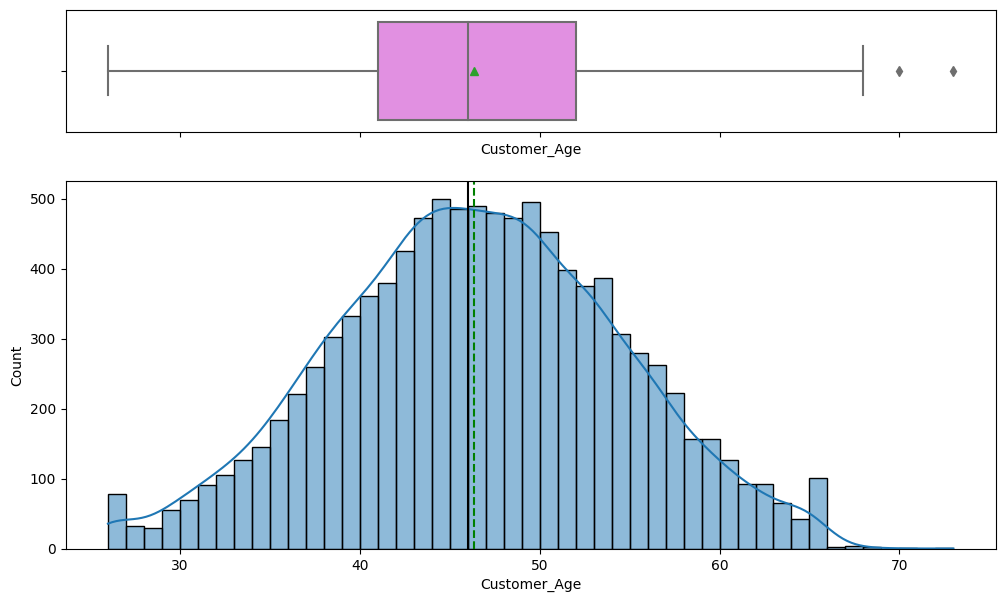%0A)

`Months_on_book`

In \[22\]:

    histogram_boxplot(data, "Months_on_book", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

![](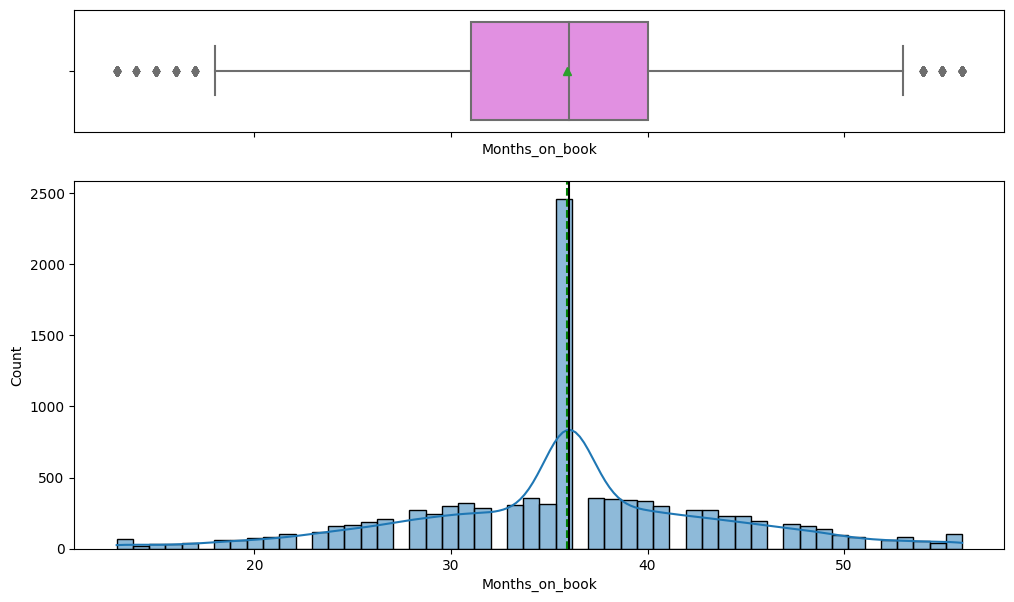%0A)

`Credit_Limit`

the above plot indicate that the highest peak for month on book is 2500

In \[23\]:

    histogram_boxplot(data, "Credit_Limit", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

![](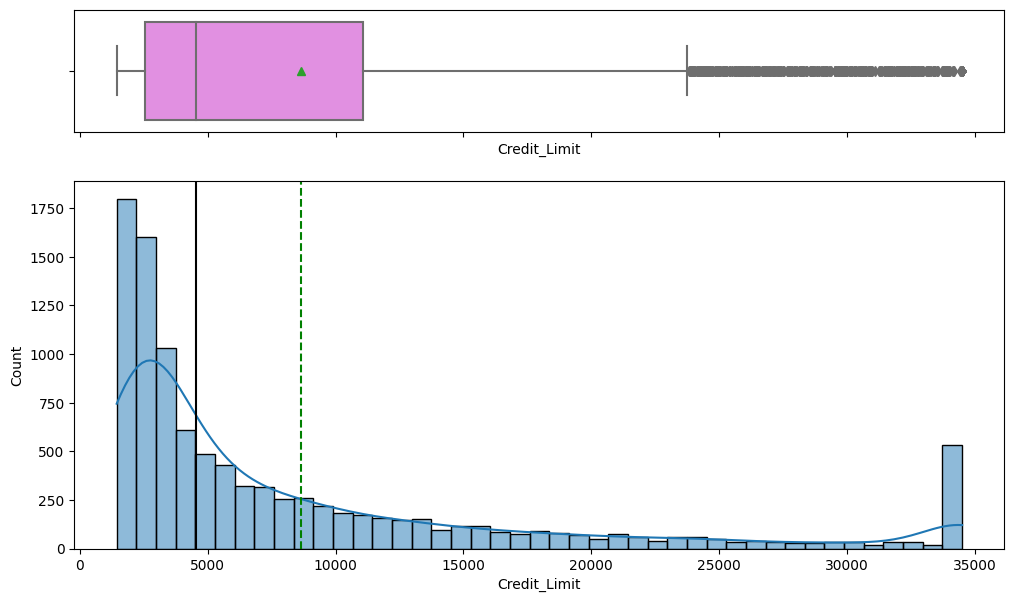%0A)

`Total_Revolving_Bal`

the above boxplot indicate that there are outlier in credit limit column

In \[24\]:

    histogram_boxplot(data, "Total_Revolving_Bal", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

![](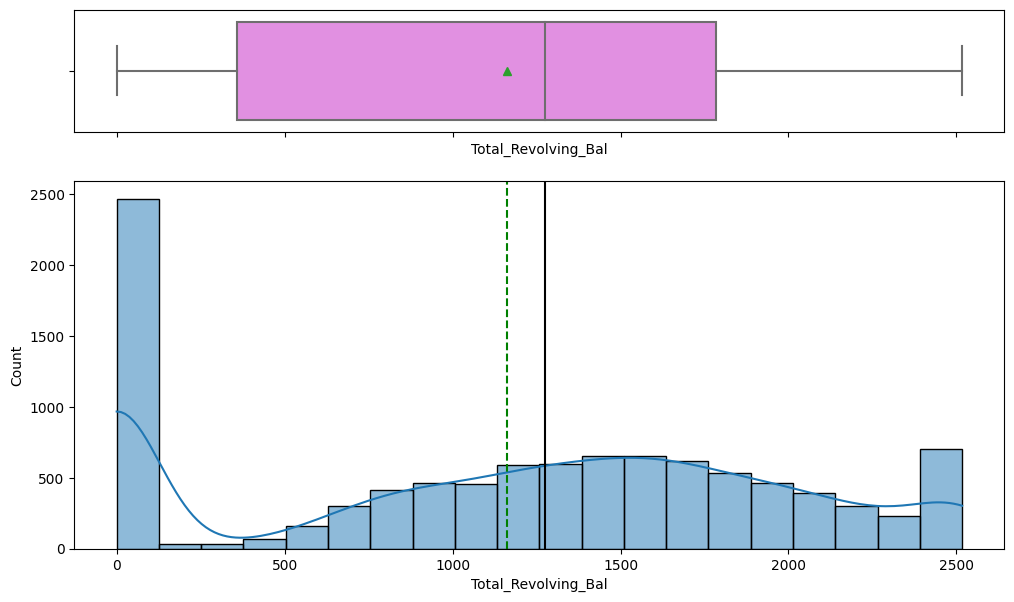%0A)

the plot above shows that the highest number of balance revolving is
2500

`Avg_Open_To_Buy`

In \[25\]:

    histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

![](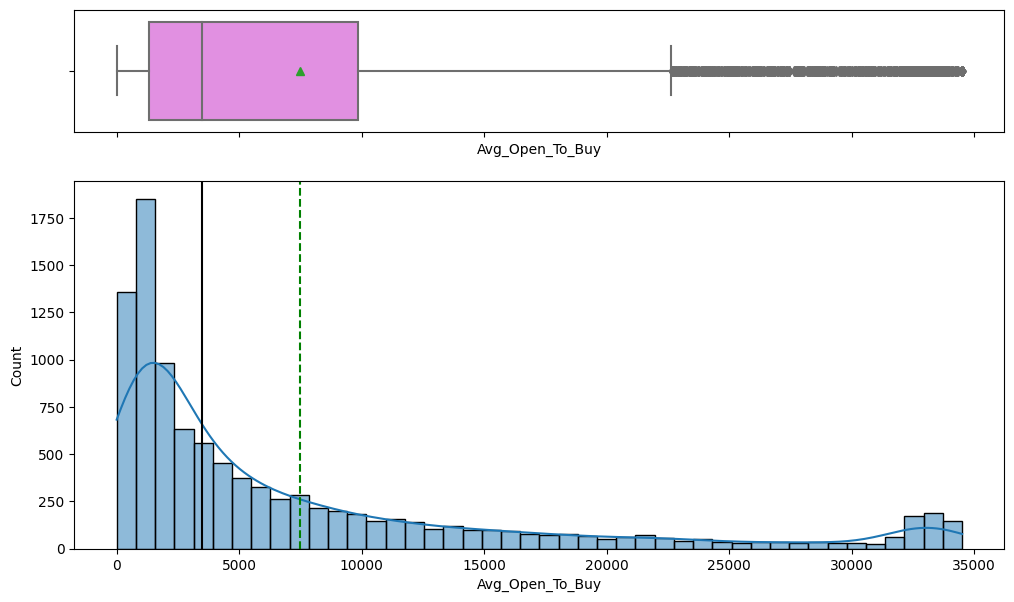%0A)

there is alot of outlier in avg open

`Total_Trans_Ct`

In \[26\]:

    histogram_boxplot(data, "Total_Trans_Ct", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

![](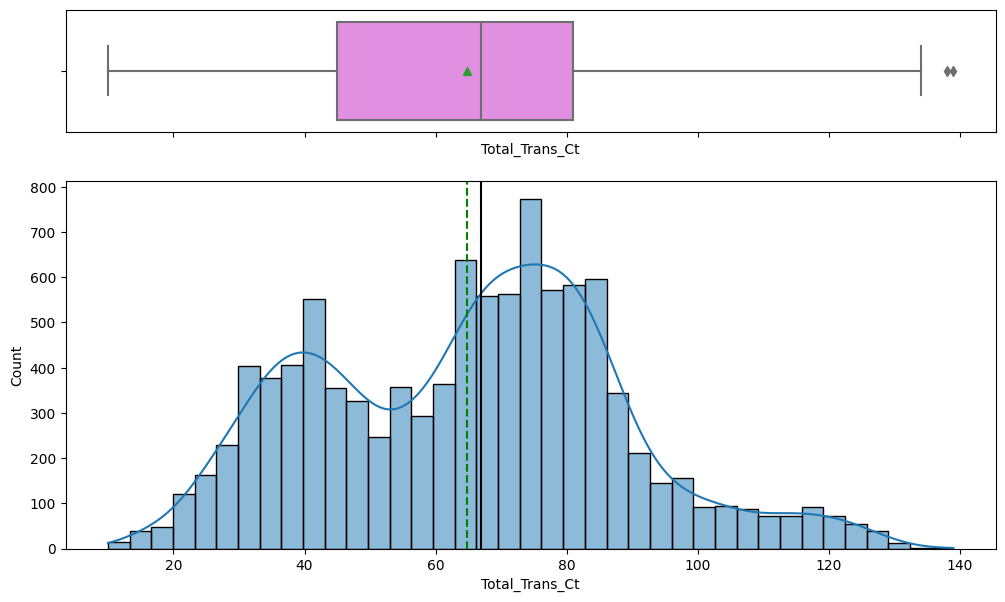%0A)

`Total_Amt_Chng_Q4_Q1`

In \[27\]:

    histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

![](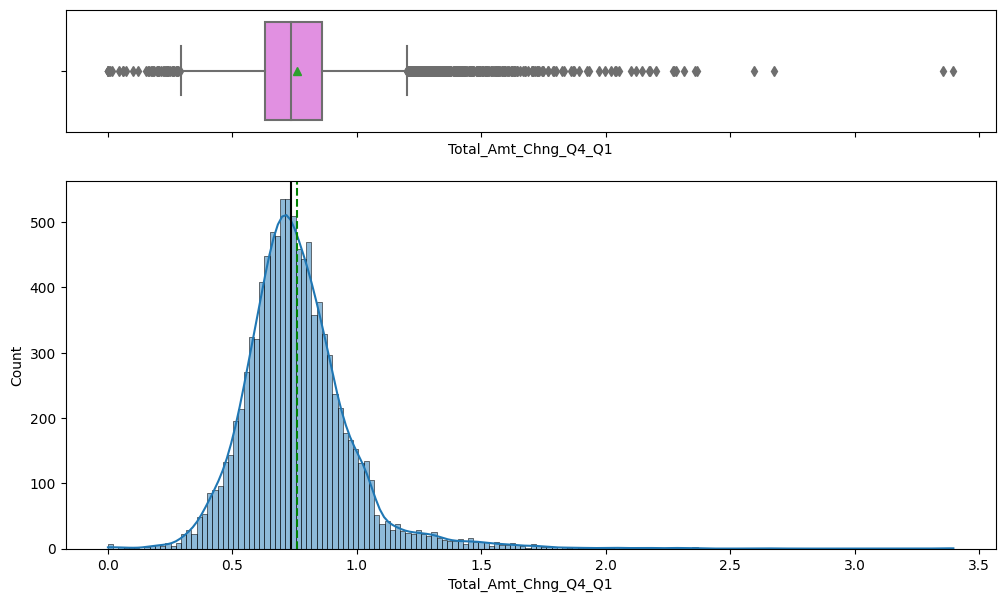%0A)

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

In \[28\]:

    histogram_boxplot(data, "Customer_Age", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

![](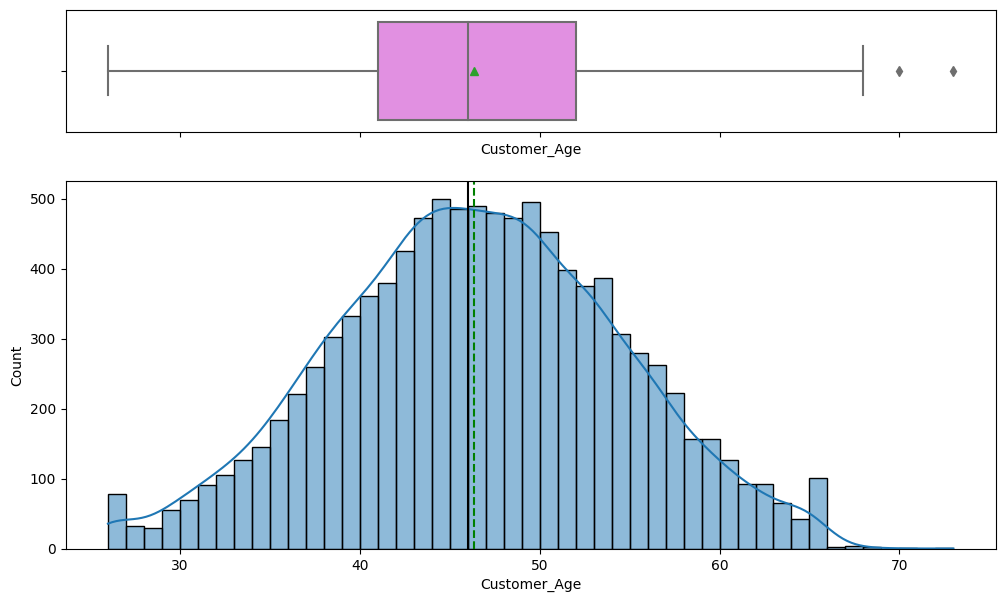%0A)

the highest number of age is 45

`Total_Ct_Chng_Q4_Q1`

In \[29\]:

    histogram_boxplot(data, "Customer_Age", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

![](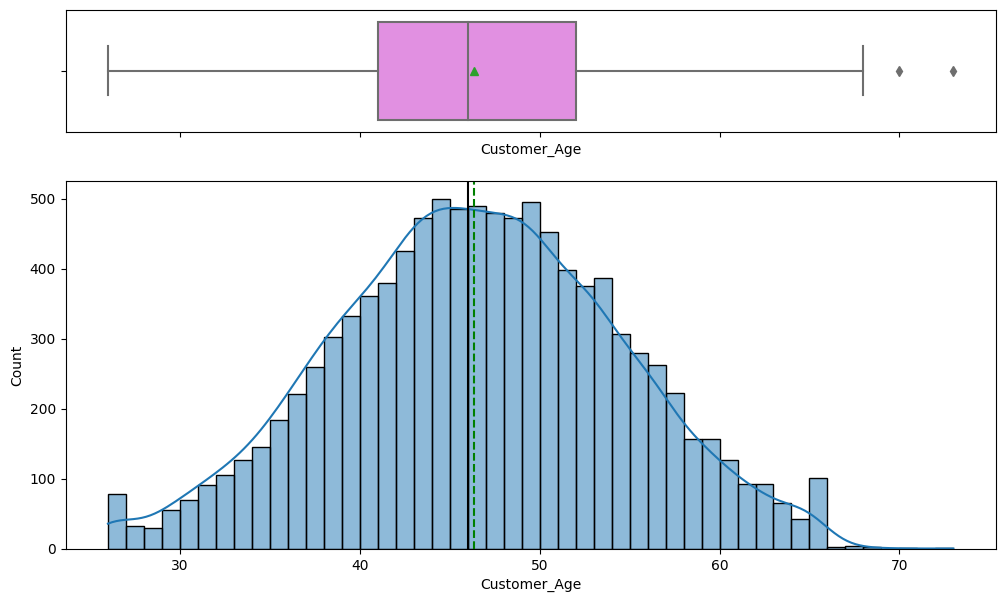%0A)

`Avg_Utilization_Ratio`

In \[30\]:

    histogram_boxplot(data, "Customer_Age", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

![](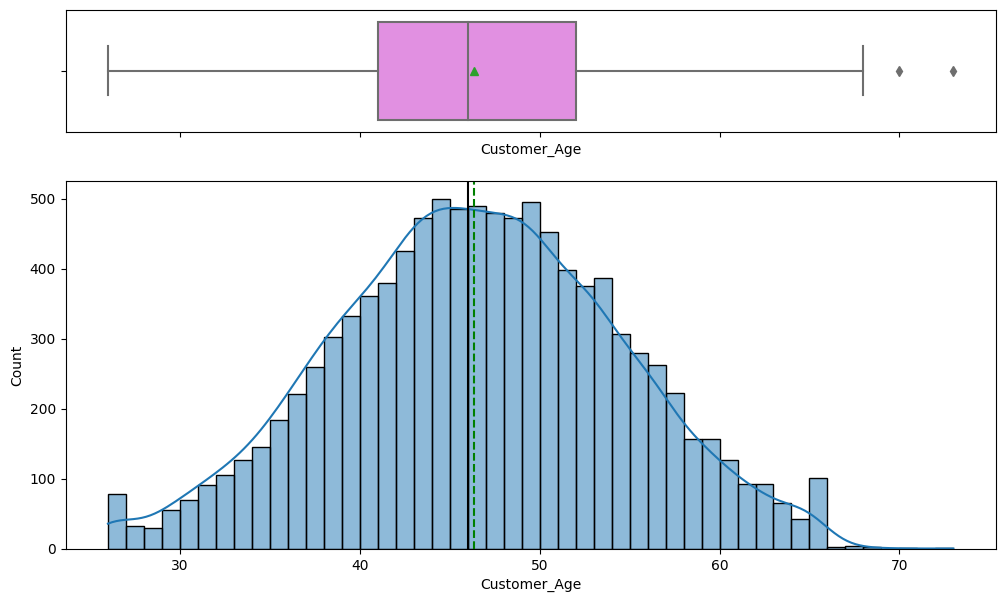%0A)

`Dependent_count`

In \[31\]:

    labeled_barplot(data, "Dependent_count")

![](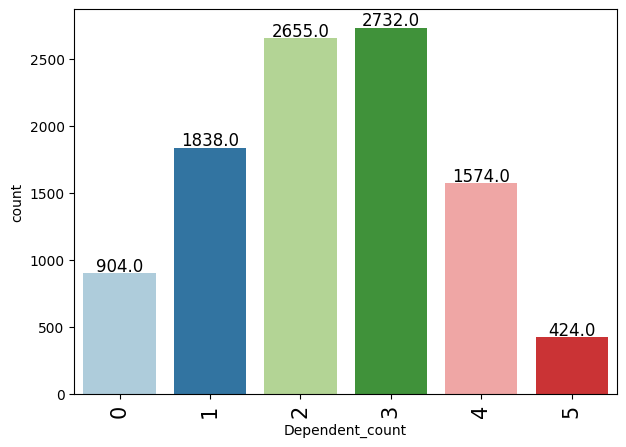%0A)

`Total_Relationship_Count`

In \[32\]:

    labeled_barplot(data, "Total_Relationship_Count") ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

![](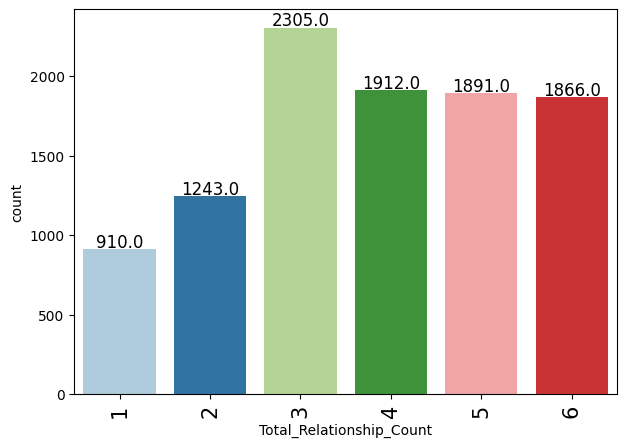%0A)

`Months_Inactive_12_mon`

In \[33\]:

    labeled_barplot(data, "Months_Inactive_12_mon") ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

![](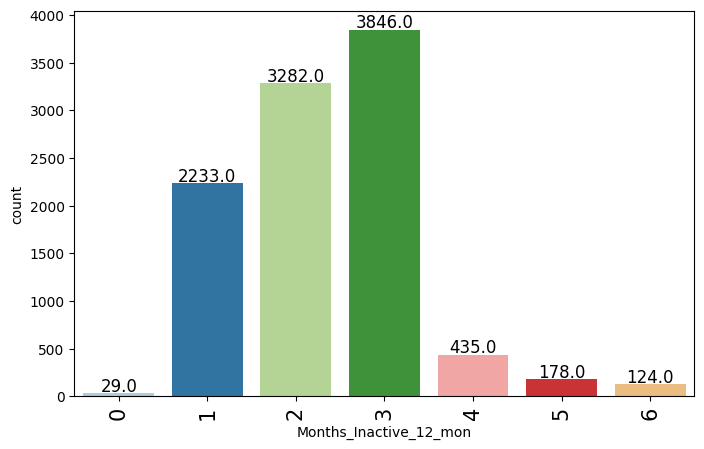%0A)

the highest number of inactive month is 3846

`Contacts_Count_12_mon`

In \[34\]:

    labeled_barplot(data, "Contacts_Count_12_mon") ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'

![](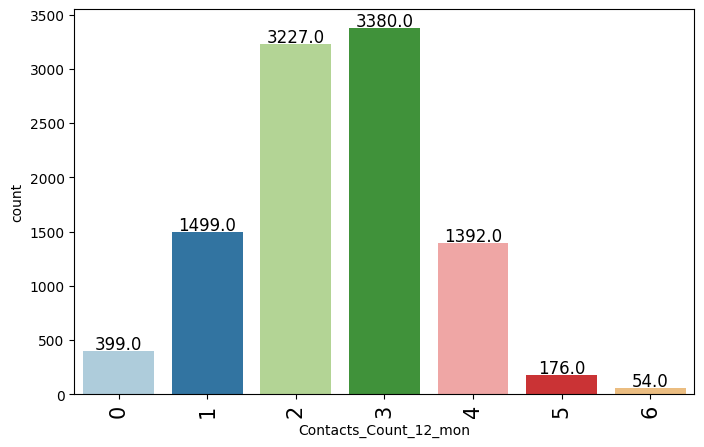%0A)

`Gender`

In \[35\]:

    labeled_barplot(data, "Gender") ## Complete the code to create labeled_barplot for 'Gender'

![](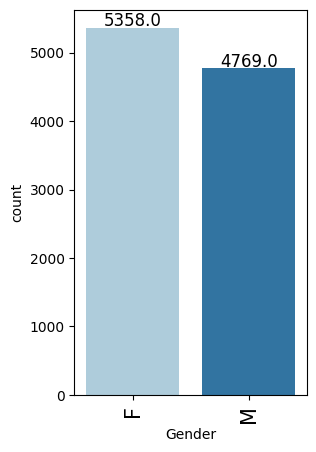%0A)

there more female customer than male

**Let's see the distribution of the level of education of customers**

`Education_Level`

In \[36\]:

    labeled_barplot(data, "Education_Level") ## Complete the code to create labeled_barplot for 'Education_Level'

![](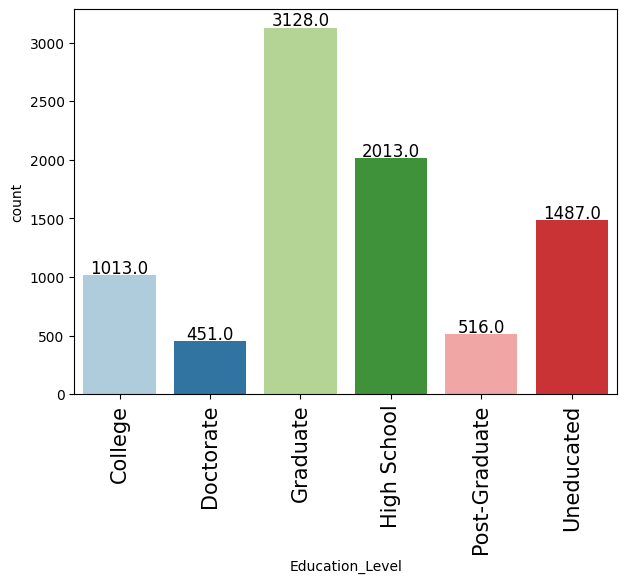%0A)

`Marital_Status`

In \[37\]:

    labeled_barplot(data, "Marital_Status") ## Complete the code to create labeled_barplot for 'Marital_Status'

![](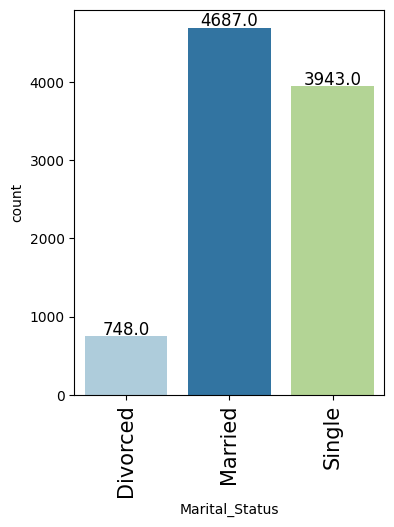%0A)

married customer are more than single and divorce is the least

**Let's see the distribution of the level of income of customers**

`Income_Category`

In \[38\]:

    labeled_barplot(data, "Income_Category") ## Complete the code to create labeled_barplot for 'Income_Category'

![](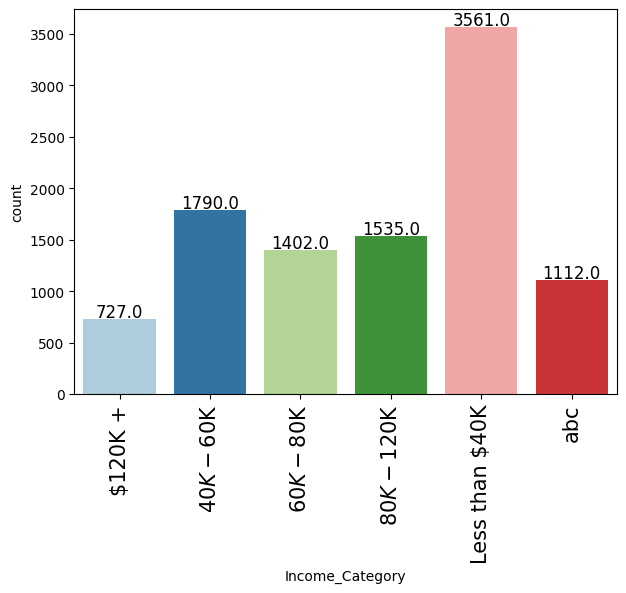%0A)

customer earning less than 40k are the highest number of customer

`Card_Category`

In \[39\]:

    labeled_barplot(data, "Card_Category") ## Complete the code to create labeled_barplot for 'Card_Category'

![](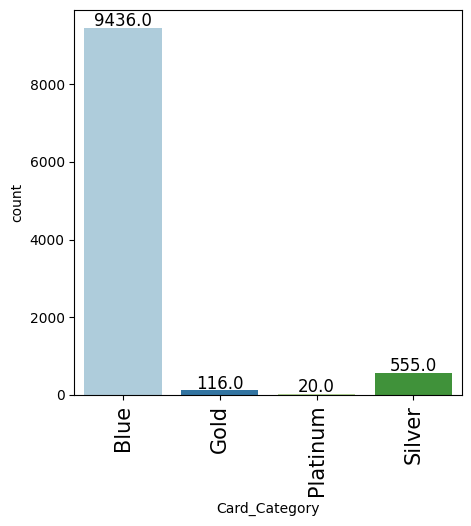%0A)

the customer with blue card are the most of the card holder

`Attrition_Flag`

In \[40\]:

    labeled_barplot(data, "Attrition_Flag") ## Complete the code to create labeled_barplot for 'Attrition_Flag'

![](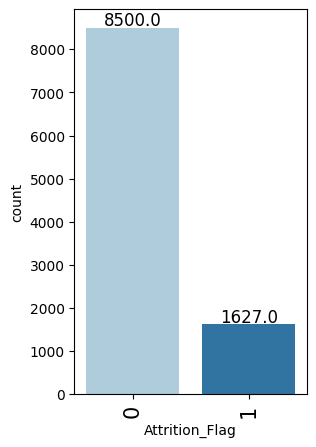%0A)

In \[41\]:

    # creating histograms
    data.hist(figsize=(14, 14))
    plt.show()

![](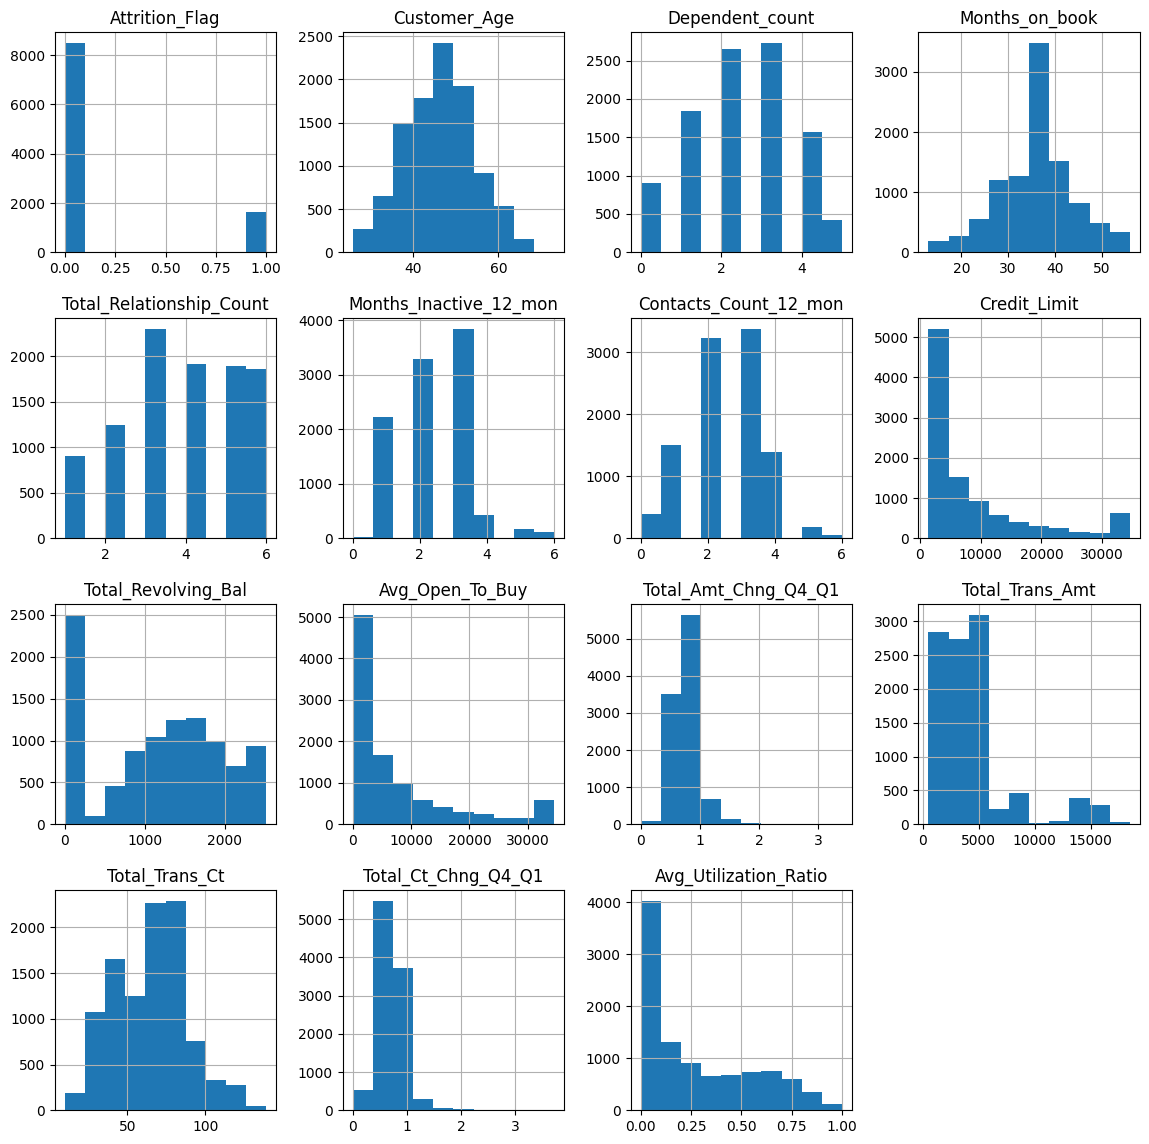%0A)

### Bivariate Distributions<a href="#Bivariate-Distributions" class="anchor-link">¶</a>

**Let's see the attributes that have a strong correlation with each
other**

**Correlation Check**

In \[42\]:

    plt.figure(figsize=(15, 7))
    sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
    plt.show()

![](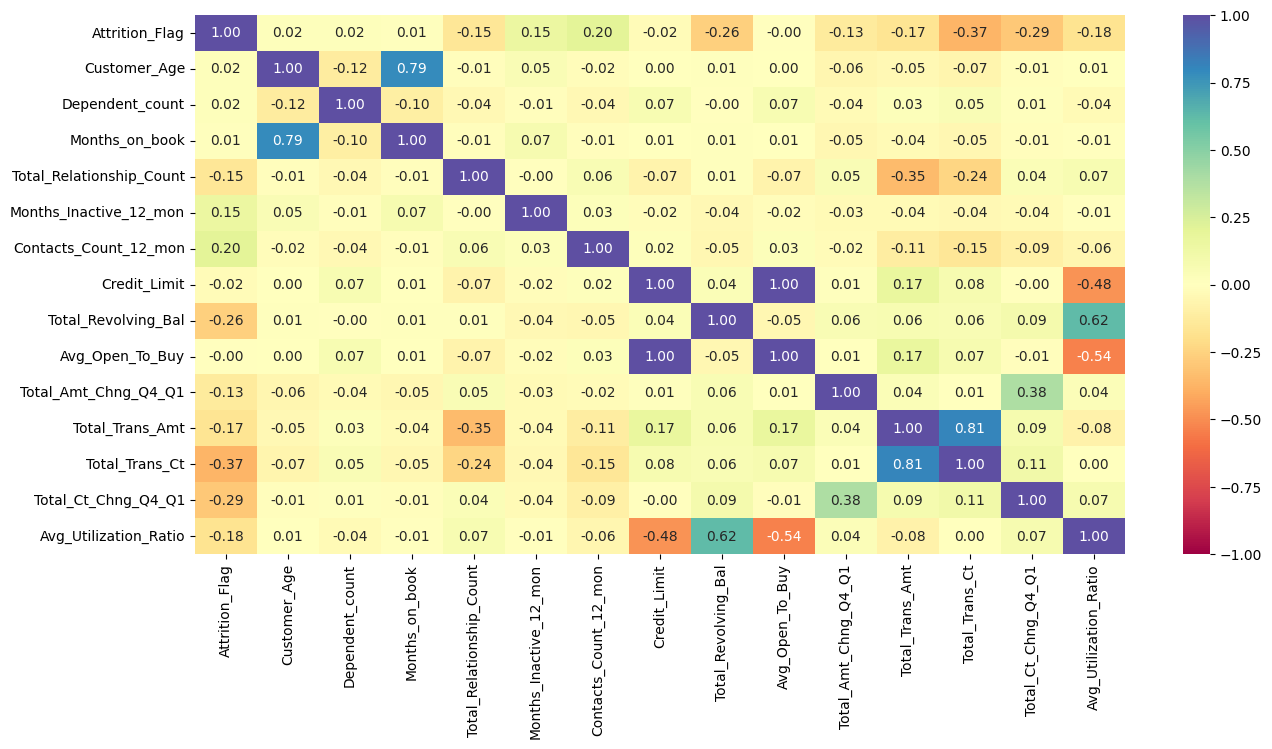%0A)

total trans credit and total amount has the highest corr

`Attrition_Flag vs Gender`

In \[43\]:

    stacked_barplot(data, "Gender", "Attrition_Flag")

    Attrition_Flag     0     1    All
    Gender                           
    All             8500  1627  10127
    F               4428   930   5358
    M               4072   697   4769
    ------------------------------------------------------------------------------------------------------------------------

![](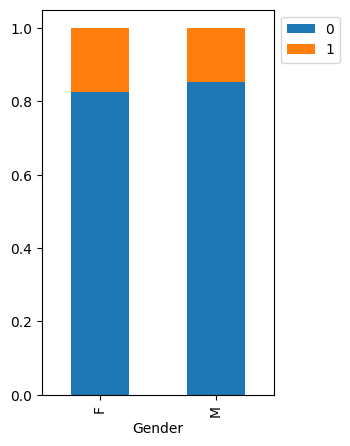%0A)

`Attrition_Flag vs Marital_Status`

In \[44\]:

    stacked_barplot(data,"Attrition_Flag", "Marital_Status") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

    Marital_Status  Divorced  Married  Single   All
    Attrition_Flag                                 
    All                  748     4687    3943  9378
    0                    627     3978    3275  7880
    1                    121      709     668  1498
    ------------------------------------------------------------------------------------------------------------------------

![](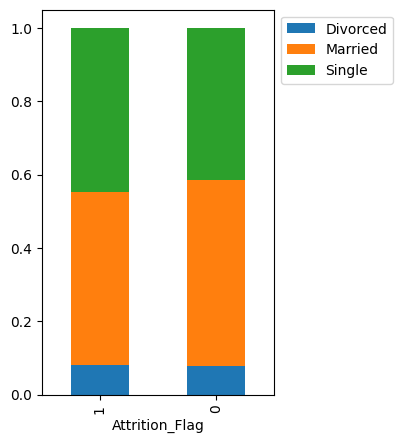%0A)

we have married than the single in the flag

`Attrition_Flag vs Education_Level`

In \[45\]:

    stacked_barplot(data,"Attrition_Flag", "Education_Level") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

    Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
    Attrition_Flag                                                              
    All                 1013        451      3128         2013            516   
    0                    859        356      2641         1707            424   
    1                    154         95       487          306             92   

    Education_Level  Uneducated   All  
    Attrition_Flag                     
    All                    1487  8608  
    0                      1250  7237  
    1                       237  1371  
    ------------------------------------------------------------------------------------------------------------------------

![](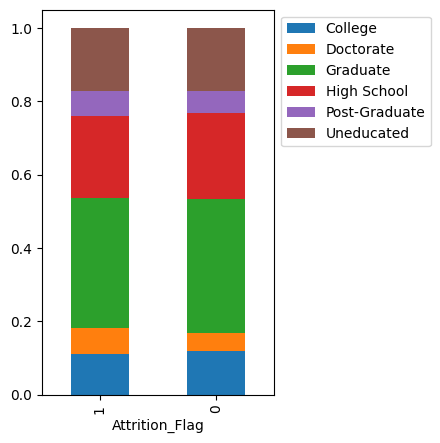%0A)

`Attrition_Flag vs Income_Category`

In \[46\]:

    stacked_barplot(data,"Attrition_Flag", "Income_Category") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

    Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
    Attrition_Flag                                                     
    All                  727         1790         1402          1535   
    0                    601         1519         1213          1293   
    1                    126          271          189           242   

    Income_Category  Less than $40K   abc    All  
    Attrition_Flag                                
    All                        3561  1112  10127  
    0                          2949   925   8500  
    1                           612   187   1627  
    ------------------------------------------------------------------------------------------------------------------------

![](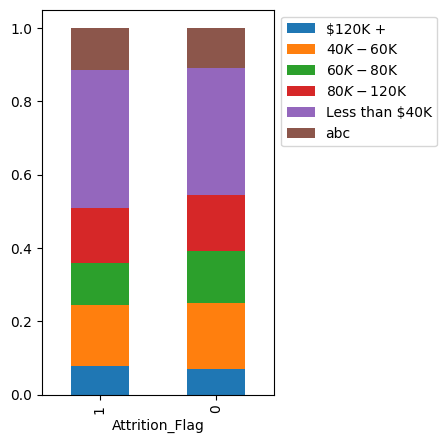%0A)

customer earning less than 40k are the most in the flag

`Attrition_Flag vs Contacts_Count_12_mon`

In \[47\]:

    stacked_barplot(data,"Attrition_Flag", "Contacts_Count_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

    Contacts_Count_12_mon    0     1     2     3     4    5   6    All
    Attrition_Flag                                                    
    1                        7   108   403   681   315   59  54   1627
    All                    399  1499  3227  3380  1392  176  54  10127
    0                      392  1391  2824  2699  1077  117   0   8500
    ------------------------------------------------------------------------------------------------------------------------

![](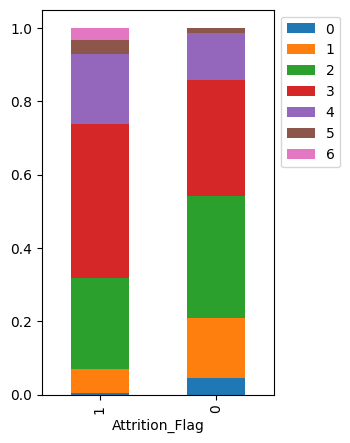%0A)

**Let's see the number of months a customer was inactive in the last 12
months (Months_Inactive_12_mon) vary by the customer's account status
(Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

In \[48\]:

    stacked_barplot(data,"Attrition_Flag", "Months_Inactive_12_mon") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

    Months_Inactive_12_mon   0     1     2     3    4    5    6    All
    Attrition_Flag                                                    
    All                     29  2233  3282  3846  435  178  124  10127
    1                       15   100   505   826  130   32   19   1627
    0                       14  2133  2777  3020  305  146  105   8500
    ------------------------------------------------------------------------------------------------------------------------

![](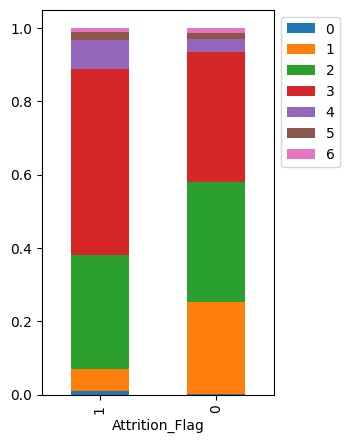%0A)

`Attrition_Flag vs Total_Relationship_Count`

In \[49\]:

    stacked_barplot(data,"Attrition_Flag", "Total_Relationship_Count") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

    Total_Relationship_Count    1     2     3     4     5     6    All
    Attrition_Flag                                                    
    All                       910  1243  2305  1912  1891  1866  10127
    0                         677   897  1905  1687  1664  1670   8500
    1                         233   346   400   225   227   196   1627
    ------------------------------------------------------------------------------------------------------------------------

![](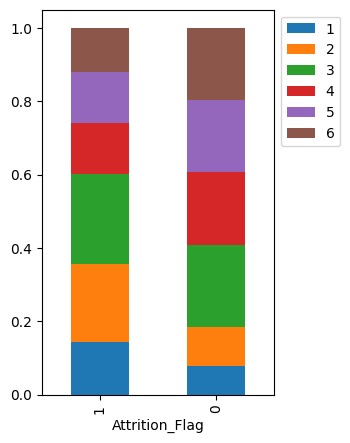%0A)

`Attrition_Flag vs Dependent_count`

In \[50\]:

    stacked_barplot(data,"Attrition_Flag", "Dependent_count") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

    Dependent_count    0     1     2     3     4    5    All
    Attrition_Flag                                          
    All              904  1838  2655  2732  1574  424  10127
    0                769  1569  2238  2250  1314  360   8500
    1                135   269   417   482   260   64   1627
    ------------------------------------------------------------------------------------------------------------------------

![](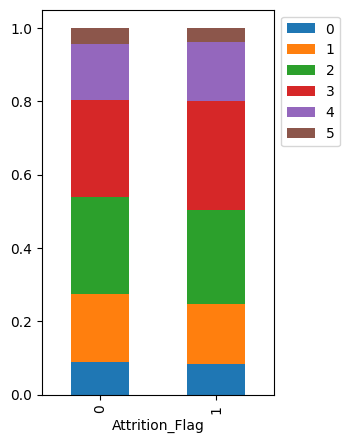%0A)

`Total_Revolving_Bal` vs `Attrition_Flag`

In \[51\]:

    distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

![](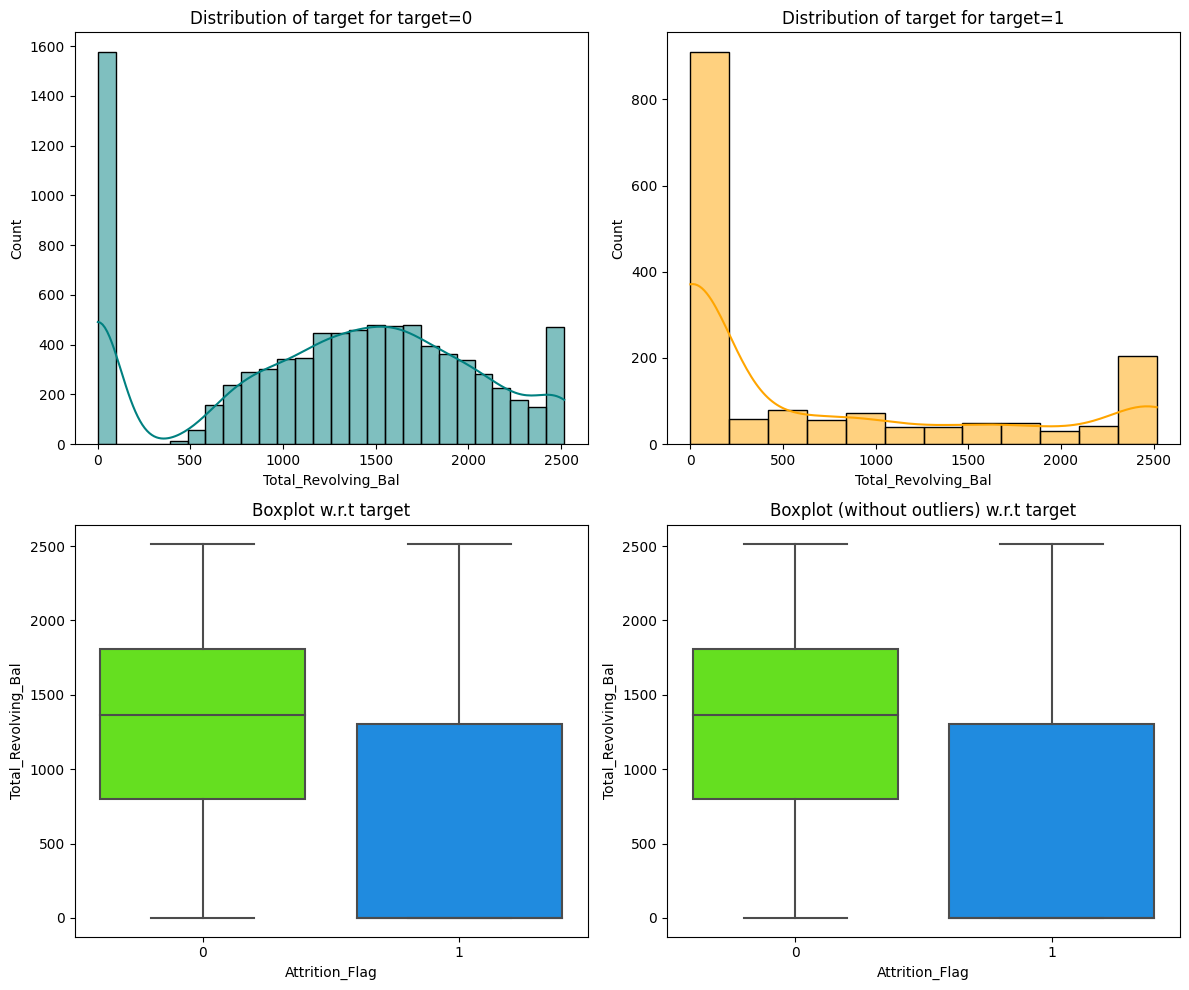%0A)

`Attrition_Flag vs Credit_Limit`

In \[52\]:

    distribution_plot_wrt_target(data, "Credit_Limit","Attrition_Flag" ) ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

![](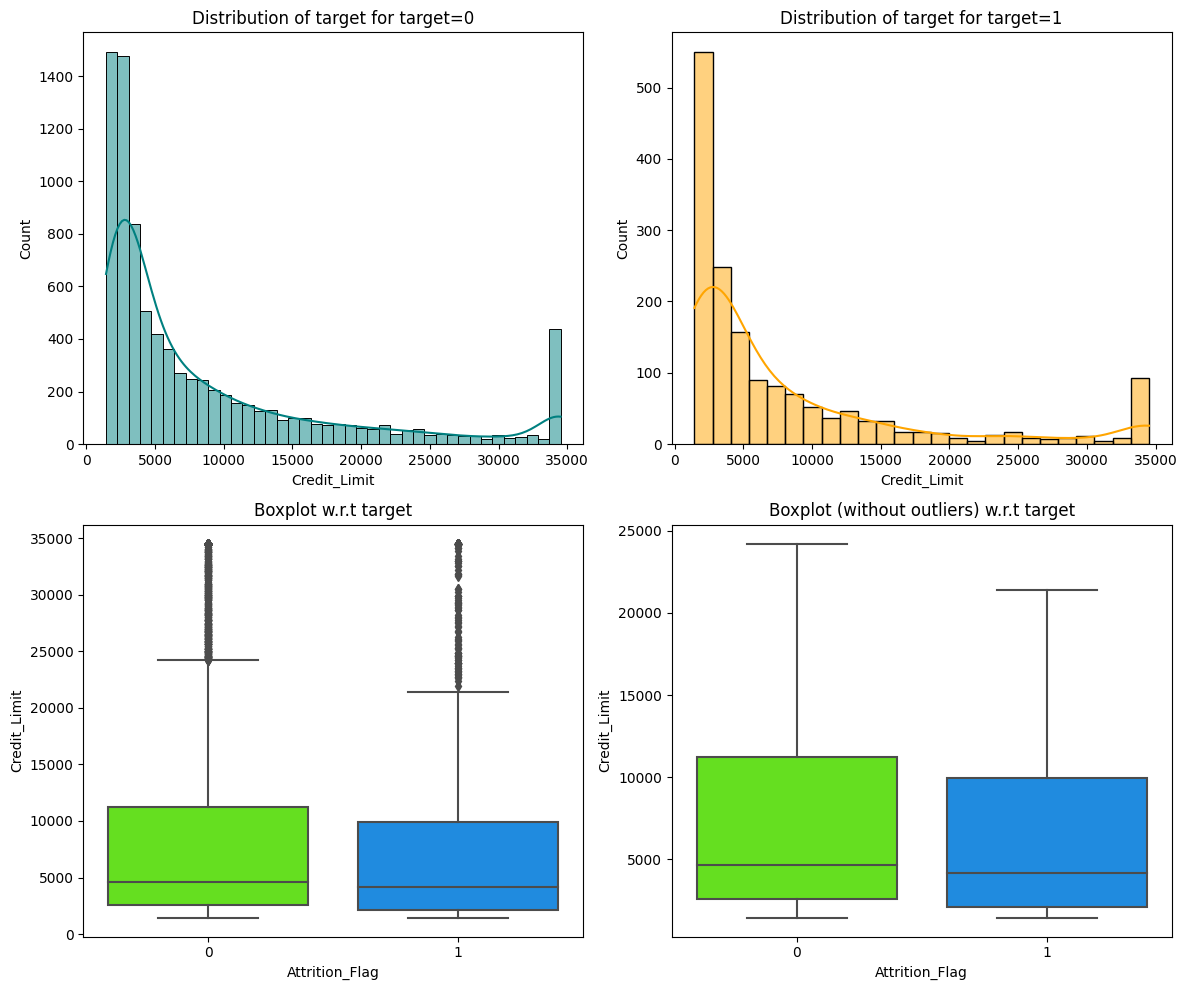%0A)

`Attrition_Flag vs Customer_Age`

In \[53\]:

    distribution_plot_wrt_target(data,"Customer_Age", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

![](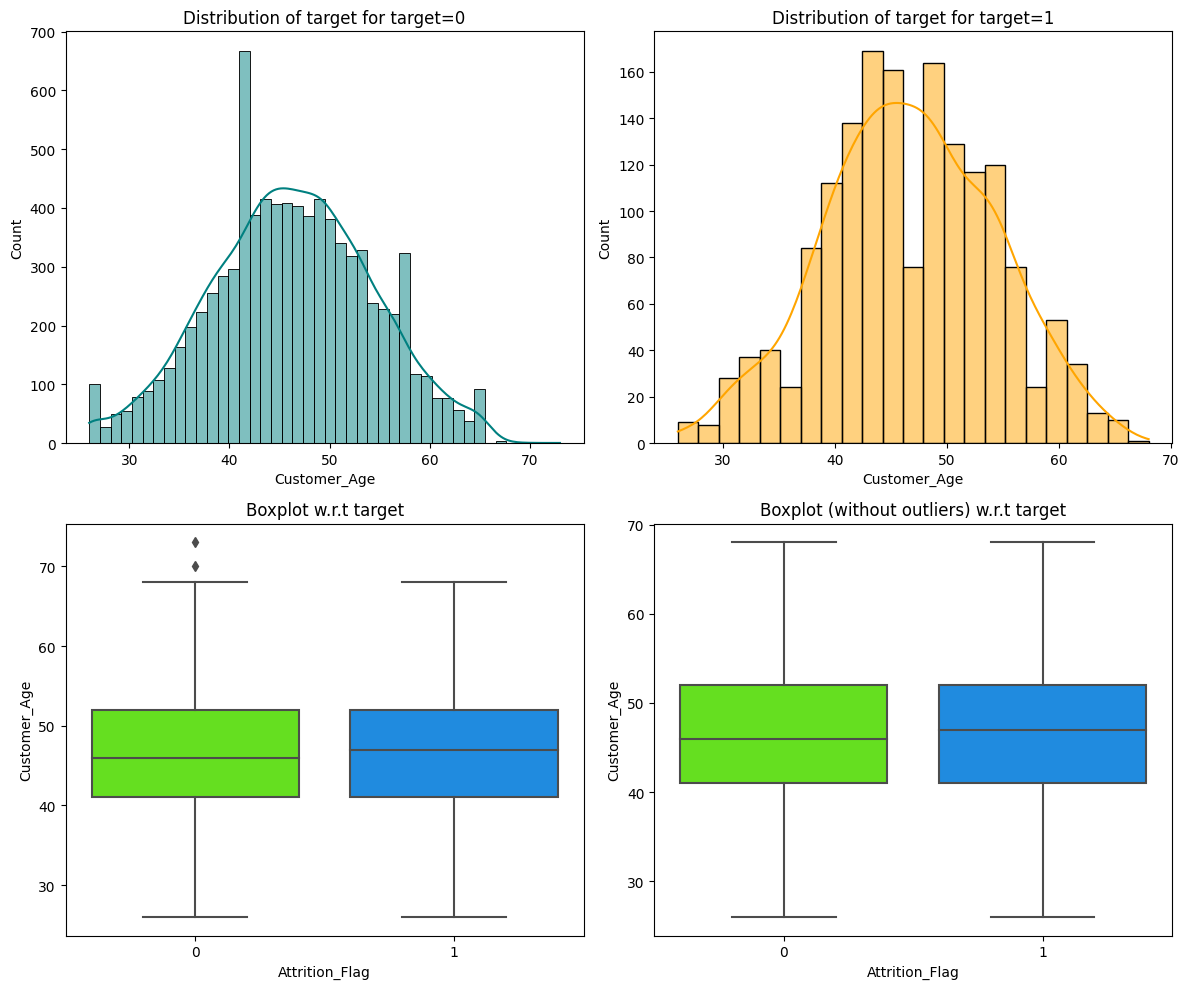%0A)

`Total_Trans_Ct` vs `Attrition_Flag`

In \[54\]:

    distribution_plot_wrt_target(data,"Total_Trans_Ct", "Attrition_Flag") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

![](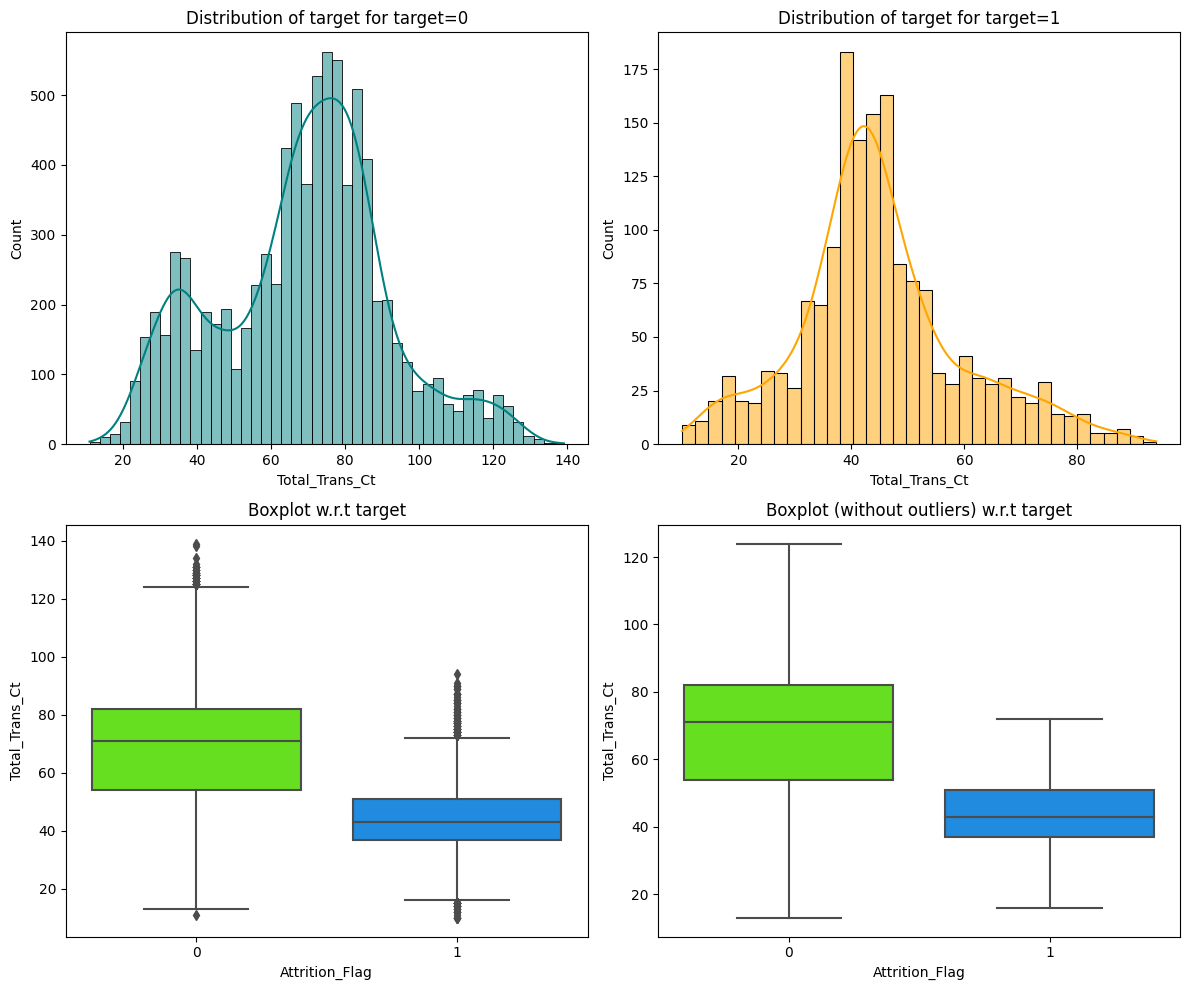%0A)

`Total_Trans_Amt` vs `Attrition_Flag`

In \[55\]:

    distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Trans_Amt") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

![](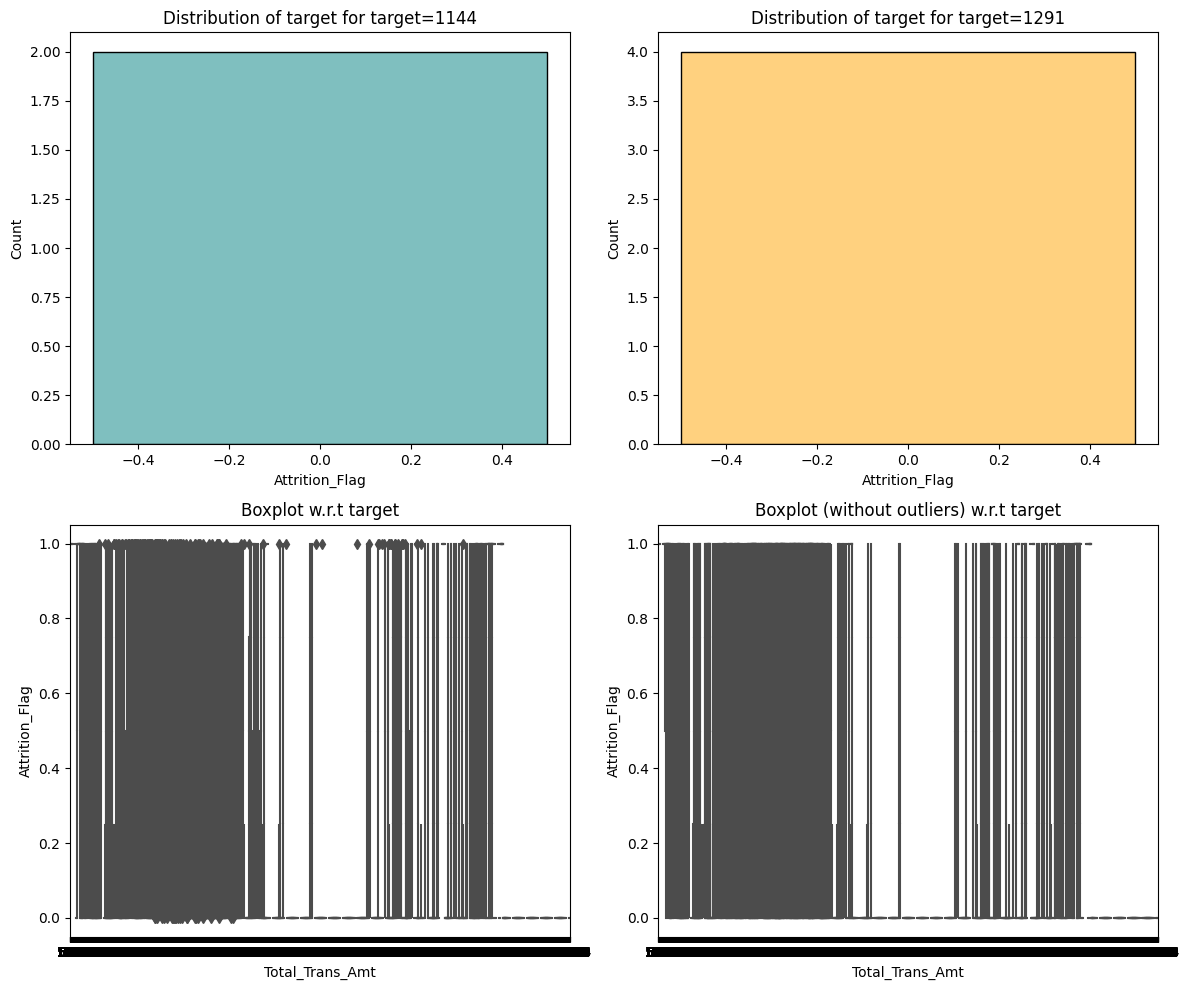%0A)

**Let's see the change in transaction amount between Q4 and Q1
(total_ct_change_Q4_Q1) vary by the customer's account status
(Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

In \[56\]:

    distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Ct_Chng_Q4_Q1") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

![](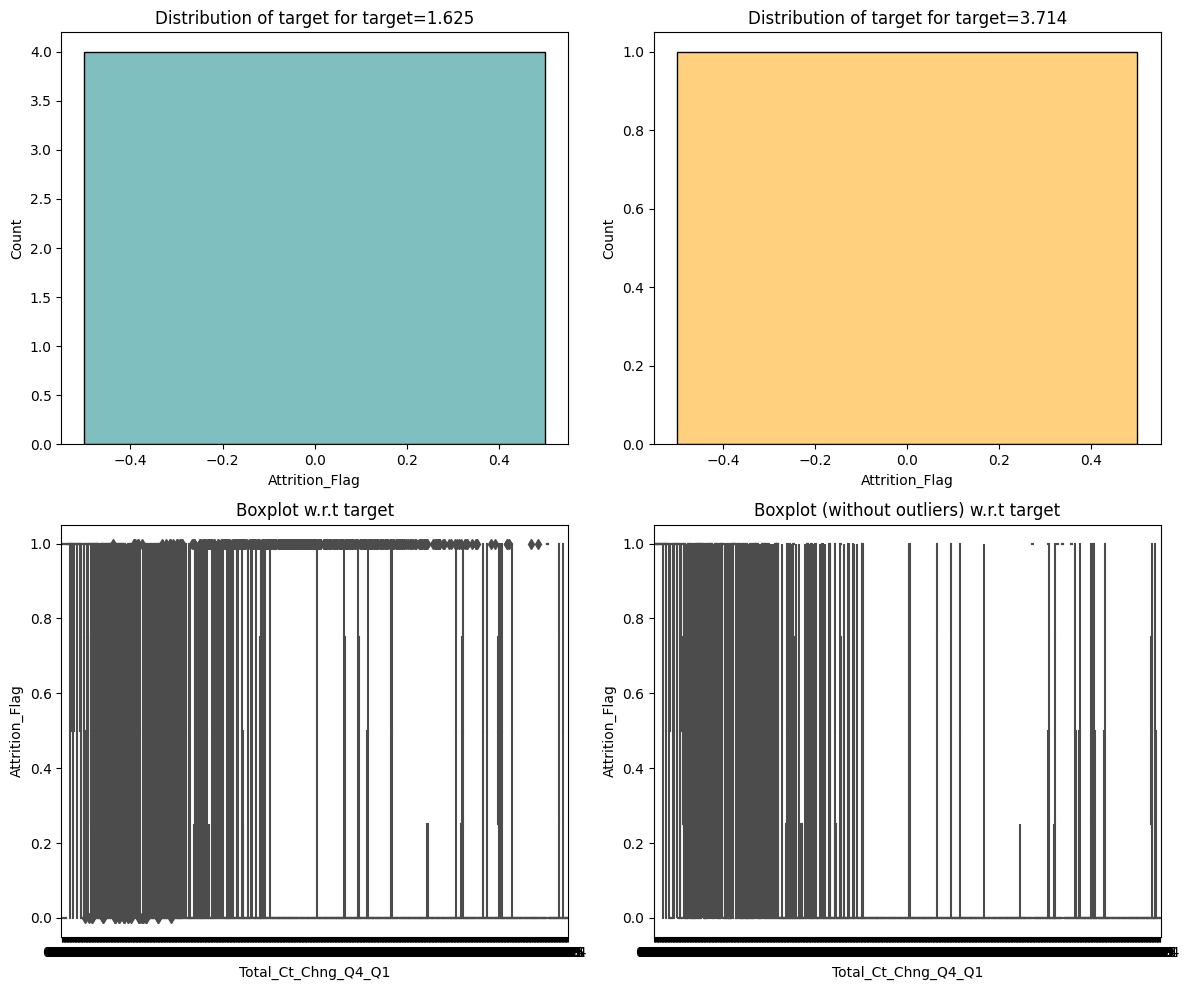%0A)

`Avg_Utilization_Ratio` vs `Attrition_Flag`

In \[ \]:

    distribution_plot_wrt_target(data, "Attrition_Flag", "Avg_Utilization_Ratio") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag

`Attrition_Flag vs Months_on_book`

In \[58\]:

    distribution_plot_wrt_target(data,"Months_on_book","Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

![](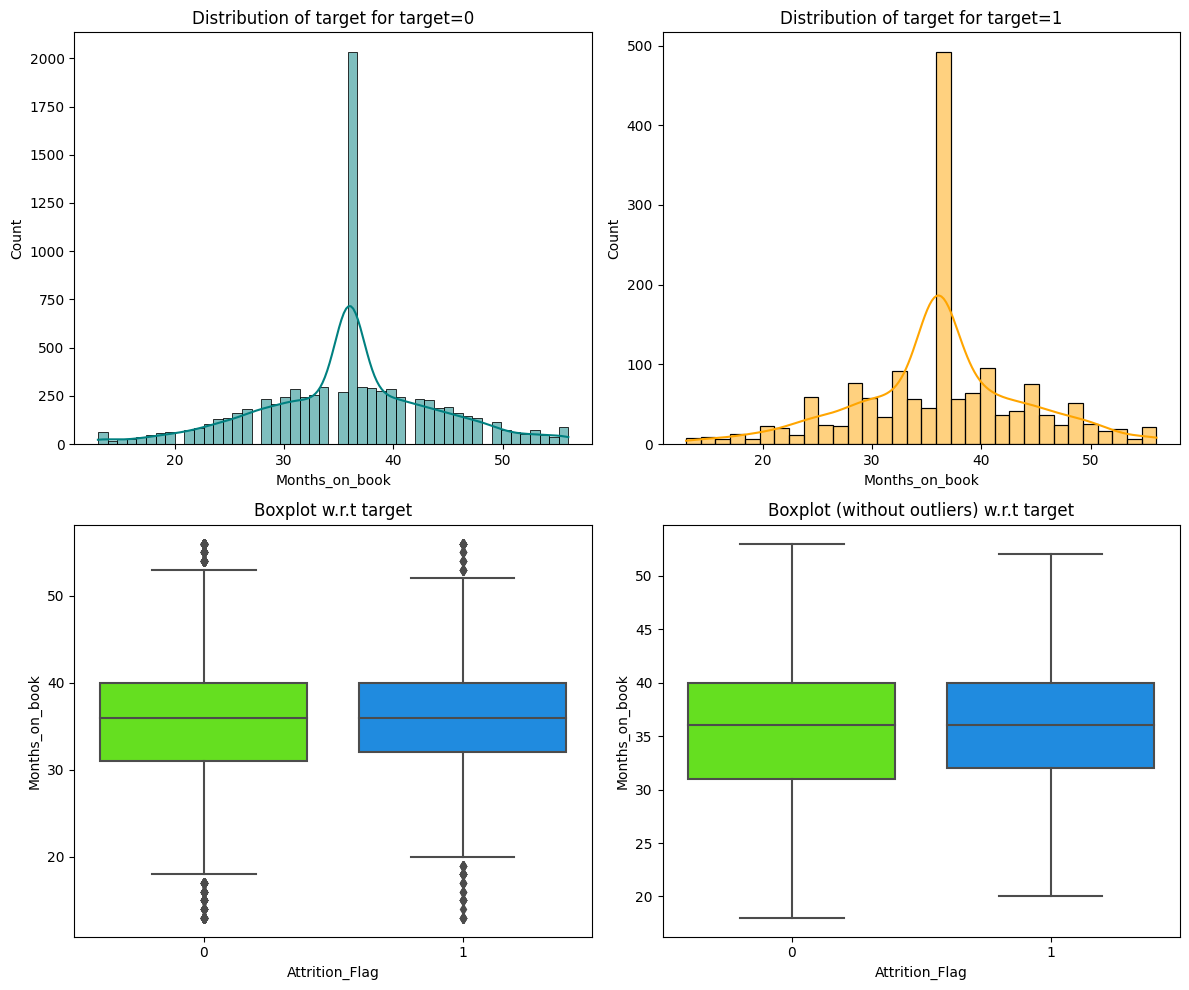%0A)

`Attrition_Flag vs Total_Revolving_Bal`

In \[ \]:

    distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

`Attrition_Flag vs Avg_Open_To_Buy`

In \[60\]:

    distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

![](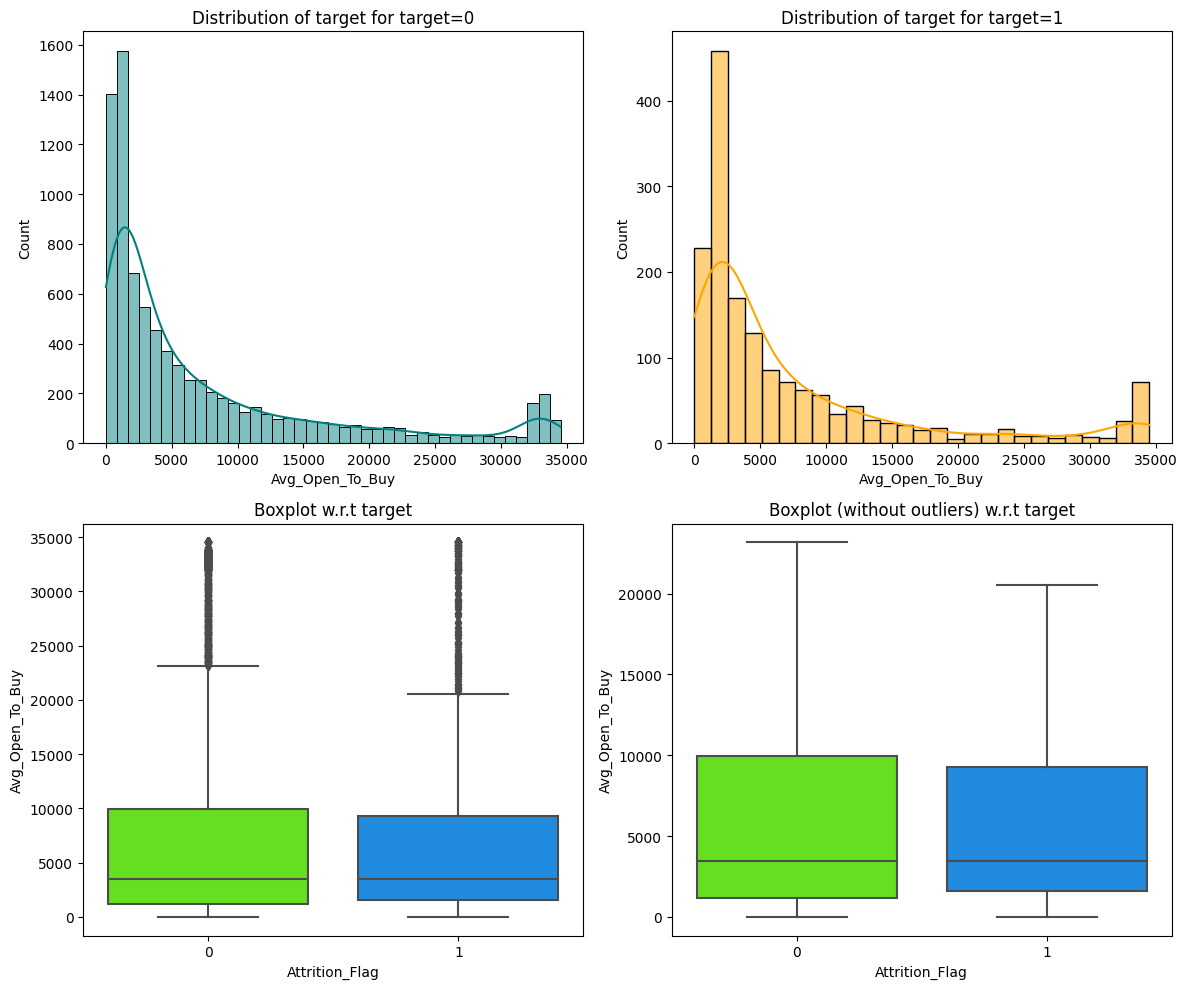%0A)

from the plot above we can see that the credit revolving, avg to
open,and the attrition flag has a lot to do in the data

In \[ \]:

     

## Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

### Outlier Detection<a href="#Outlier-Detection" class="anchor-link">¶</a>

In \[61\]:

    Q1 = data.quantile(0.25)  # To find the 25th percentile
    Q3 = data.quantile(0.75)  # To find the 75th percentile

    IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

    # Finding lower and upper bounds for all values. All values outside these bounds are outliers
    lower = (Q1 - 1.5 * IQR)
    upper = (Q3 + 1.5 * IQR)

In \[62\]:

    # checking the % outliers
    ((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

Out\[62\]:

    Attrition_Flag             16.066
    Customer_Age                0.020
    Dependent_count             0.000
    Months_on_book              3.812
    Total_Relationship_Count    0.000
    Months_Inactive_12_mon      3.268
    Contacts_Count_12_mon       6.211
    Credit_Limit                9.717
    Total_Revolving_Bal         0.000
    Avg_Open_To_Buy             9.509
    Total_Amt_Chng_Q4_Q1        3.910
    Total_Trans_Amt             8.848
    Total_Trans_Ct              0.020
    Total_Ct_Chng_Q4_Q1         3.891
    Avg_Utilization_Ratio       0.000
    dtype: float64

### Train-Test Split<a href="#Train-Test-Split" class="anchor-link">¶</a>

In \[63\]:

    # creating the copy of the dataframe
    data1 = data.copy()

In \[64\]:

    data1["Income_Category"].replace("abc", np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

In \[65\]:

    data1.isna().sum()

Out\[65\]:

    Attrition_Flag                 0
    Customer_Age                   0
    Gender                         0
    Dependent_count                0
    Education_Level             1519
    Marital_Status               749
    Income_Category             1112
    Card_Category                  0
    Months_on_book                 0
    Total_Relationship_Count       0
    Months_Inactive_12_mon         0
    Contacts_Count_12_mon          0
    Credit_Limit                   0
    Total_Revolving_Bal            0
    Avg_Open_To_Buy                0
    Total_Amt_Chng_Q4_Q1           0
    Total_Trans_Amt                0
    Total_Trans_Ct                 0
    Total_Ct_Chng_Q4_Q1            0
    Avg_Utilization_Ratio          0
    dtype: int64

In \[66\]:

    data1.head()

Out\[66\]:

|     | Attrition_Flag | Customer_Age | Gender | Dependent_count | Education_Level | Marital_Status | Income_Category | Card_Category | Months_on_book | Total_Relationship_Count | Months_Inactive_12_mon | Contacts_Count_12_mon | Credit_Limit | Total_Revolving_Bal | Avg_Open_To_Buy | Total_Amt_Chng_Q4_Q1 | Total_Trans_Amt | Total_Trans_Ct | Total_Ct_Chng_Q4_Q1 | Avg_Utilization_Ratio |
|-----|----------------|--------------|--------|-----------------|-----------------|----------------|-----------------|---------------|----------------|--------------------------|------------------------|-----------------------|--------------|---------------------|-----------------|----------------------|-----------------|----------------|---------------------|-----------------------|
| 0   | 0              | 45           | M      | 3               | High School     | Married        | \$60K - \$80K   | Blue          | 39             | 5                        | 1                      | 3                     | 12691.000    | 777                 | 11914.000       | 1.335                | 1144            | 42             | 1.625               | 0.061                 |
| 1   | 0              | 49           | F      | 5               | Graduate        | Single         | Less than \$40K | Blue          | 44             | 6                        | 1                      | 2                     | 8256.000     | 864                 | 7392.000        | 1.541                | 1291            | 33             | 3.714               | 0.105                 |
| 2   | 0              | 51           | M      | 3               | Graduate        | Married        | \$80K - \$120K  | Blue          | 36             | 4                        | 1                      | 0                     | 3418.000     | 0                   | 3418.000        | 2.594                | 1887            | 20             | 2.333               | 0.000                 |
| 3   | 0              | 40           | F      | 4               | High School     | NaN            | Less than \$40K | Blue          | 34             | 3                        | 4                      | 1                     | 3313.000     | 2517                | 796.000         | 1.405                | 1171            | 20             | 2.333               | 0.760                 |
| 4   | 0              | 40           | M      | 3               | Uneducated      | Married        | \$60K - \$80K   | Blue          | 21             | 5                        | 1                      | 0                     | 4716.000     | 0                   | 4716.000        | 2.175                | 816             | 28             | 2.500               | 0.000                 |





In \[66\]:

     

In \[67\]:

    # creating an instace of the imputer to be used
    imputer = SimpleImputer(strategy="most_frequent")

In \[68\]:

    # Dividing train data into X and y

    X = data1.drop(["Attrition_Flag"], axis=1)
    Y = data1["Attrition_Flag"]

In \[69\]:

    # Splitting data into training and validation set:

    X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=1) ## Complete the code to split the data into train test in the ratio 80:20

    X_test, X_val, y_test, y_val = train_test_split(X, Y, test_size=0.25, random_state=1) ## Complete the code to split the data into train test in the ratio 75:25

    print(X_train.shape, X_val.shape, X_test.shape)

    (8101, 19) (2532, 19) (7595, 19)

### Missing value imputation<a href="#Missing-value-imputation" class="anchor-link">¶</a>

In \[70\]:

    reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In \[71\]:

    # Fit and transform the train data
    X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

    # Transform the validation data
    X_val[reqd_col_for_impute]  =  imputer.fit_transform(X_val[reqd_col_for_impute])  ## Complete the code to impute missing values in X_val

    # Transform the test data
    X_test[reqd_col_for_impute] = imputer.fit_transform(X_test[reqd_col_for_impute]) ## Complete the code to impute missing values in X_test

In \[72\]:

    # Checking that no column has missing values in train or test sets
    print(X_train.isna().sum())
    print("-" * 30)
    print(X_val.isna().sum())
    print("-" * 30)
    print(X_test.isna().sum())

    Customer_Age                0
    Gender                      0
    Dependent_count             0
    Education_Level             0
    Marital_Status              0
    Income_Category             0
    Card_Category               0
    Months_on_book              0
    Total_Relationship_Count    0
    Months_Inactive_12_mon      0
    Contacts_Count_12_mon       0
    Credit_Limit                0
    Total_Revolving_Bal         0
    Avg_Open_To_Buy             0
    Total_Amt_Chng_Q4_Q1        0
    Total_Trans_Amt             0
    Total_Trans_Ct              0
    Total_Ct_Chng_Q4_Q1         0
    Avg_Utilization_Ratio       0
    dtype: int64
    ------------------------------
    Customer_Age                0
    Gender                      0
    Dependent_count             0
    Education_Level             0
    Marital_Status              0
    Income_Category             0
    Card_Category               0
    Months_on_book              0
    Total_Relationship_Count    0
    Months_Inactive_12_mon      0
    Contacts_Count_12_mon       0
    Credit_Limit                0
    Total_Revolving_Bal         0
    Avg_Open_To_Buy             0
    Total_Amt_Chng_Q4_Q1        0
    Total_Trans_Amt             0
    Total_Trans_Ct              0
    Total_Ct_Chng_Q4_Q1         0
    Avg_Utilization_Ratio       0
    dtype: int64
    ------------------------------
    Customer_Age                0
    Gender                      0
    Dependent_count             0
    Education_Level             0
    Marital_Status              0
    Income_Category             0
    Card_Category               0
    Months_on_book              0
    Total_Relationship_Count    0
    Months_Inactive_12_mon      0
    Contacts_Count_12_mon       0
    Credit_Limit                0
    Total_Revolving_Bal         0
    Avg_Open_To_Buy             0
    Total_Amt_Chng_Q4_Q1        0
    Total_Trans_Amt             0
    Total_Trans_Ct              0
    Total_Ct_Chng_Q4_Q1         0
    Avg_Utilization_Ratio       0
    dtype: int64

now the missing value has been deal with

In \[73\]:

    cols = X_train.select_dtypes(include=["object", "category"])
    for i in cols.columns:
        print(X_train[i].value_counts())
        print("*" * 30)

    F    4297
    M    3804
    Name: Gender, dtype: int64
    ******************************
    Graduate         3703
    High School      1601
    Uneducated       1210
    College           814
    Post-Graduate     409
    Doctorate         364
    Name: Education_Level, dtype: int64
    ******************************
    Married     4365
    Single      3123
    Divorced     613
    Name: Marital_Status, dtype: int64
    ******************************
    Less than $40K    3744
    $40K - $60K       1437
    $80K - $120K      1228
    $60K - $80K       1114
    $120K +            578
    Name: Income_Category, dtype: int64
    ******************************
    Blue        7534
    Silver       461
    Gold          88
    Platinum      18
    Name: Card_Category, dtype: int64
    ******************************

In \[74\]:

    cols = X_val.select_dtypes(include=["object", "category"])
    for i in cols.columns:
        print(X_val[i].value_counts())
        print("*" * 30)

    F    1324
    M    1208
    Name: Gender, dtype: int64
    ******************************
    Graduate         1180
    High School       512
    Uneducated        346
    College           244
    Post-Graduate     134
    Doctorate         116
    Name: Education_Level, dtype: int64
    ******************************
    Married     1330
    Single      1032
    Divorced     170
    Name: Marital_Status, dtype: int64
    ******************************
    Less than $40K    1166
    $40K - $60K        435
    $80K - $120K       392
    $60K - $80K        349
    $120K +            190
    Name: Income_Category, dtype: int64
    ******************************
    Blue        2374
    Silver       120
    Gold          35
    Platinum       3
    Name: Card_Category, dtype: int64
    ******************************

In \[75\]:

    cols = X_test.select_dtypes(include=["object", "category"])
    for i in cols.columns:
        print(X_train[i].value_counts())
        print("*" * 30)

    F    4297
    M    3804
    Name: Gender, dtype: int64
    ******************************
    Graduate         3703
    High School      1601
    Uneducated       1210
    College           814
    Post-Graduate     409
    Doctorate         364
    Name: Education_Level, dtype: int64
    ******************************
    Married     4365
    Single      3123
    Divorced     613
    Name: Marital_Status, dtype: int64
    ******************************
    Less than $40K    3744
    $40K - $60K       1437
    $80K - $120K      1228
    $60K - $80K       1114
    $120K +            578
    Name: Income_Category, dtype: int64
    ******************************
    Blue        7534
    Silver       461
    Gold          88
    Platinum      18
    Name: Card_Category, dtype: int64
    ******************************

### Encoding categorical variables<a href="#Encoding-categorical-variables" class="anchor-link">¶</a>

In \[76\]:

    X_train = pd.get_dummies(X_train, drop_first=True)
    X_val = pd.get_dummies(X_val, drop_first=True) ## Complete the code to impute missing values in X_val
    X_test = pd.get_dummies(X_test, drop_first=True)  ## Complete the code to impute missing values in X_val
    print(X_train.shape, X_val.shape, X_test.shape)

    (8101, 29) (2532, 29) (7595, 29)

-   After encoding there are 29 columns.

In \[77\]:

    # check the top 5 rows from the train dataset
    X_train.head()

Out\[77\]:

|      | Customer_Age | Dependent_count | Months_on_book | Total_Relationship_Count | Months_Inactive_12_mon | Contacts_Count_12_mon | Credit_Limit | Total_Revolving_Bal | Avg_Open_To_Buy | Total_Amt_Chng_Q4_Q1 | Total_Trans_Amt | Total_Trans_Ct | Total_Ct_Chng_Q4_Q1 | Avg_Utilization_Ratio | Gender_M | Education_Level_Doctorate | Education_Level_Graduate | Education_Level_High School | Education_Level_Post-Graduate | Education_Level_Uneducated | Marital_Status_Married | Marital_Status_Single | Income_Category\_\$40K - \$60K | Income_Category\_\$60K - \$80K | Income_Category\_\$80K - \$120K | Income_Category_Less than \$40K | Card_Category_Gold | Card_Category_Platinum | Card_Category_Silver |
|------|--------------|-----------------|----------------|--------------------------|------------------------|-----------------------|--------------|---------------------|-----------------|----------------------|-----------------|----------------|---------------------|-----------------------|----------|---------------------------|--------------------------|-----------------------------|-------------------------------|----------------------------|------------------------|-----------------------|--------------------------------|--------------------------------|---------------------------------|---------------------------------|--------------------|------------------------|----------------------|
| 6641 | 51           | 0               | 35             | 5                        | 1                      | 2                     | 34516.000    | 2332                | 32184.000       | 0.800                | 4587            | 82             | 0.745               | 0.068                 | 1        | 0                         | 0                        | 0                           | 0                             | 0                          | 1                      | 0                     | 0                              | 0                              | 0                               | 0                               | 0                  | 0                      | 1                    |
| 1302 | 56           | 3               | 36             | 6                        | 3                      | 3                     | 34516.000    | 1047                | 33469.000       | 0.610                | 1378            | 30             | 0.429               | 0.030                 | 1        | 0                         | 0                        | 0                           | 0                             | 1                          | 1                      | 0                     | 0                              | 0                              | 0                               | 0                               | 0                  | 0                      | 0                    |
| 5825 | 47           | 3               | 38             | 4                        | 2                      | 3                     | 1438.300     | 0                   | 1438.300        | 1.001                | 3511            | 64             | 0.882               | 0.000                 | 0        | 0                         | 1                        | 0                           | 0                             | 0                          | 0                      | 1                     | 0                              | 0                              | 0                               | 1                               | 0                  | 0                      | 0                    |
| 1495 | 32           | 1               | 22             | 3                        | 1                      | 4                     | 16912.000    | 1590                | 15322.000       | 1.274                | 2413            | 41             | 0.708               | 0.094                 | 1        | 0                         | 0                        | 1                           | 0                             | 0                          | 1                      | 0                     | 0                              | 0                              | 0                               | 1                               | 0                  | 0                      | 0                    |
| 3342 | 50           | 3               | 39             | 5                        | 3                      | 4                     | 13824.000    | 1582                | 12242.000       | 0.522                | 4630            | 74             | 0.644               | 0.114                 | 1        | 0                         | 1                        | 0                           | 0                             | 0                          | 1                      | 0                     | 0                              | 0                              | 1                               | 0                               | 0                  | 0                      | 0                    |





## Model Building<a href="#Model-Building" class="anchor-link">¶</a>

### Model evaluation criterion<a href="#Model-evaluation-criterion" class="anchor-link">¶</a>

Model can make wrong predictions as:

-   Predicting a customer will attrite and the customer doesn't attrite
-   Predicting a customer will not attrite and the customer attrites

Which case is more important?

-   Predicting that customer will not attrite but he attrites i.e.
    losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

-   Bank would want Recall to be maximized, greater the Recall higher
    the chances of minimizing false negatives. Hence, the focus should
    be on increasing Recall or minimizing the false negatives or in
    other words identifying the true positives(i.e. Class 1) so that the
    bank can retain their valuable customers by identifying the
    customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall)
on the train and test set and a function to show confusion matrix so
that we do not have to use the same code repetitively while evaluating
models.**

In \[78\]:

    # defining a function to compute different metrics to check performance of a classification model built using sklearn
    def model_performance_classification_sklearn(model, predictors, target):
        """
        Function to compute different metrics to check classification model performance

        model: classifier
        predictors: independent variables
        target: dependent variable
        """

        # predicting using the independent variables
        pred = model.predict(predictors)

        acc = accuracy_score(target, pred)  # to compute Accuracy
        recall = recall_score(target, pred)  # to compute Recall
        precision = precision_score(target, pred)  # to compute Precision
        f1 = f1_score(target, pred)  # to compute F1-score

        # creating a dataframe of metrics
        df_perf = pd.DataFrame(
            {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
            index=[0],
        )

        return df_perf

In \[79\]:

    def confusion_matrix_sklearn(model, predictors, target):
        """
        To plot the confusion_matrix with percentages

        model: classifier
        predictors: independent variables
        target: dependent variable
        """
        y_pred = model.predict(predictors)
        cm = confusion_matrix(target, y_pred)
        labels = np.asarray(
            [
                ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
                for item in cm.flatten()
            ]
        ).reshape(2, 2)

        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

### Model Building - Original Data<a href="#Model-Building---Original-Data" class="anchor-link">¶</a>

In \[80\]:

    models = []  # Empty list to store all the models

    # Appending models into the list
    models.append(("Logistic regression", LogisticRegression(random_state=1)))
    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("GBM", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
     ## Complete the code to append remaining 4 models in the list models

    print("\n" "Training Performance:" "\n")
    for name, model in models:
        model.fit(X_train, y_train)
        scores = recall_score(y_train, model.predict(X_train))
        print("{}: {}".format(name, scores))

    print("\n" "Validation Performance:" "\n")

    for name, model in models:
        model.fit(X_train, y_train)
        scores_val = recall_score(y_val, model.predict(X_val))
        print("{}: {}".format(name, scores_val))

    Training Performance:

    Logistic regression: 0.37808641975308643
    Bagging: 0.9845679012345679
    GBM: 0.8904320987654321
    Adaboost: 0.8526234567901234
    Xgboost: 1.0

    Validation Performance:

    Logistic regression: 0.40987654320987654
    Bagging: 0.8444444444444444
    GBM: 0.8493827160493828
    Adaboost: 0.8222222222222222
    Xgboost: 0.9185185185185185

### Model Building - Oversampled Data<a href="#Model-Building---Oversampled-Data" class="anchor-link">¶</a>

In \[81\]:

    print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
    print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

    sm = SMOTE(
        sampling_strategy=1, k_neighbors=5, random_state=1
    )  # Synthetic Minority Over Sampling Technique
    X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


    print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
    print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


    print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
    print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

    Before Oversampling, counts of label 'Yes': 1296
    Before Oversampling, counts of label 'No': 6805 

    After Oversampling, counts of label 'Yes': 6805
    After Oversampling, counts of label 'No': 6805 

    After Oversampling, the shape of train_X: (13610, 29)
    After Oversampling, the shape of train_y: (13610,) 

In \[82\]:

    models = []  # Empty list to store all the models

    # Appending models into the list
    models.append(("Logistic regression", LogisticRegression(random_state=1)))
    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("GBM", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
    ## Complete the code to append remaining 4 models in the list models


    print("\n" "Training Performance:" "\n")
    for name, model in models:
        model.fit(X_train_over, y_train_over)
        scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
        print("{}: {}".format(name, scores))

    print("\n" "Validation Performance:" "\n")

    for name, model in models:
        model.fit(X_train_over, y_train_over)
        scores = recall_score(y_val, model.predict(X_val))
        print("{}: {}".format(name, scores))

    Training Performance:

    Logistic regression: 0.8230712711241734
    Bagging: 0.9977957384276267
    GBM: 0.9822189566495224
    Adaboost: 0.97060984570169
    Xgboost: 1.0

    Validation Performance:

    Logistic regression: 0.7950617283950617
    Bagging: 0.8641975308641975
    GBM: 0.9135802469135802
    Adaboost: 0.8641975308641975
    Xgboost: 0.928395061728395

### Model Building - Undersampled Data<a href="#Model-Building---Undersampled-Data" class="anchor-link">¶</a>

In \[83\]:

    rus = RandomUnderSampler(random_state=1)
    X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In \[84\]:

    print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
    print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

    print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
    print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

    print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
    print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

    Before Under Sampling, counts of label 'Yes': 1296
    Before Under Sampling, counts of label 'No': 6805 

    After Under Sampling, counts of label 'Yes': 1296
    After Under Sampling, counts of label 'No': 1296 

    After Under Sampling, the shape of train_X: (2592, 29)
    After Under Sampling, the shape of train_y: (2592,) 

In \[85\]:

    models = []  # Empty list to store all the models

    # Appending models into the list
    models.append(("Logistic regression", LogisticRegression(random_state=1)))
    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("GBM", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
    ## Complete the code to append remaining 4 models in the list models


    print("\n" "Training Performance:" "\n")
    for name, model in models:
        model.fit(X_train_un, y_train_un)
        scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
        print("{}: {}".format(name, scores))

    print("\n" "Validation Performance:" "\n")

    for name, model in models:
        model.fit(X_train_un, y_train_un)
        scores = recall_score(y_val, model.predict(X_val))
        print("{}: {}".format(name, scores))

    Training Performance:

    Logistic regression: 0.8317901234567902
    Bagging: 0.9938271604938271
    GBM: 0.9807098765432098
    Adaboost: 0.9567901234567902
    Xgboost: 1.0

    Validation Performance:

    Logistic regression: 0.8296296296296296
    Bagging: 0.9407407407407408
    GBM: 0.9679012345679012
    Adaboost: 0.9555555555555556
    Xgboost: 0.9703703703703703

### Hyperparameter Tuning<a href="#Hyperparameter-Tuning" class="anchor-link">¶</a>

#### **Note**<a href="#Note" class="anchor-link">¶</a>

1.  Sample parameter grid has been provided to do necessary
    hyperparameter tuning. One can extend/reduce the parameter grid
    based on execution time and system configuration to try to improve
    the model performance further wherever needed.
2.  The models chosen in this notebook are based on test runs. One can
    update the best models as obtained upon code execution and tune them
    for best performance.

#### Tuning AdaBoost using Undersampled data<a href="#Tuning-AdaBoost-using-Undersampled-data"
class="anchor-link">¶</a>

In \[86\]:

    %%time

    # defining model
    Model = AdaBoostClassifier(random_state=1)

    # Parameter grid to pass in RandomSearchCV
    param_grid = {
        "n_estimators": np.arange(10, 110, 10),
        "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
        "base_estimator": [
            DecisionTreeClassifier(max_depth=1, random_state=1),
            DecisionTreeClassifier(max_depth=2, random_state=1),
            DecisionTreeClassifier(max_depth=3, random_state=1),
        ],
    }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.recall_score)

    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on under sampled data

    print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

    Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8974071874071875:
    CPU times: user 5.16 s, sys: 678 ms, total: 5.84 s
    Wall time: 3min 53s

In \[87\]:

    # Creating new pipeline with best parameters
    tuned_ada1 = AdaBoostClassifier( random_state=1,
        n_estimators= 10, learning_rate=1, base_estimator= DecisionTreeClassifier(max_depth=1, random_state=1)
    ) ## Complete the code with the best parameters obtained from tuning

    tuned_ada1.fit(X_train, y_train) ## Complete the code to fit the model on undersampled data

Out\[87\]:

    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                             random_state=1),
                       learning_rate=1, n_estimators=10, random_state=1)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

AdaBoostClassifier

    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                             random_state=1),
                       learning_rate=1, n_estimators=10, random_state=1)

base_estimator: DecisionTreeClassifier

    DecisionTreeClassifier(max_depth=1, random_state=1)

DecisionTreeClassifier

    DecisionTreeClassifier(max_depth=1, random_state=1)

In \[88\]:

    # Checking model's performance on training set
    adb1_train = model_performance_classification_sklearn(tuned_ada1, X_train_un, y_train_un)
    adb1_train

Out\[88\]:

|     | Accuracy | Recall | Precision | F1    |
|-----|----------|--------|-----------|-------|
| 0   | 0.808    | 0.633  | 0.974     | 0.767 |





In \[89\]:

    # Checking model's performance on validation set
    adb1_val = model_performance_classification_sklearn(tuned_ada1, X_val, y_val) ## Complete the code to check the performance on validation set
    adb1_val

Out\[89\]:

|     | Accuracy | Recall | Precision | F1    |
|-----|----------|--------|-----------|-------|
| 0   | 0.925    | 0.647  | 0.851     | 0.735 |





#### Tuning AdaBoost using original data<a href="#Tuning-AdaBoost-using-original-data" class="anchor-link">¶</a>

In \[90\]:

    %%time

    # defining model
    Model = AdaBoostClassifier(random_state=1)

    # Parameter grid to pass in RandomSearchCV
    param_grid = {
        "n_estimators": np.arange(10, 110, 10),
        "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
        "base_estimator": [
            DecisionTreeClassifier(max_depth=1, random_state=1),
            DecisionTreeClassifier(max_depth=2, random_state=1),
            DecisionTreeClassifier(max_depth=3, random_state=1),
        ],
    }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.recall_score)

    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

    print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

    Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8974071874071875:
    CPU times: user 5.03 s, sys: 551 ms, total: 5.59 s
    Wall time: 3min 53s

In \[91\]:

    # Creating new pipeline with best parameters
    tuned_ada2 = AdaBoostClassifier( random_state=1,
        n_estimators= 110, learning_rate= 1, base_estimator= DecisionTreeClassifier(max_depth=2, random_state=1)
    ) ## Complete the code with the best parameters obtained from tuning

    tuned_ada2.fit(X_train, y_train) ## Complete the code to fit the model on undersampled data

Out\[91\]:

    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                             random_state=1),
                       learning_rate=1, n_estimators=110, random_state=1)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

AdaBoostClassifier

    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                             random_state=1),
                       learning_rate=1, n_estimators=110, random_state=1)

base_estimator: DecisionTreeClassifier

    DecisionTreeClassifier(max_depth=2, random_state=1)

DecisionTreeClassifier

    DecisionTreeClassifier(max_depth=2, random_state=1)

In \[92\]:

    adb2_train = model_performance_classification_sklearn(tuned_ada2, X_train_un, y_train_un) ## Complete the code to check the performance on training set
    adb2_train

Out\[92\]:

|     | Accuracy | Recall | Precision | F1    |
|-----|----------|--------|-----------|-------|
| 0   | 0.993    | 0.991  | 0.996     | 0.993 |





In \[93\]:

    # Checking model's performance on validation set
    adb2_val =  model_performance_classification_sklearn(tuned_ada2, X_val, y_val) ## Complete the code to check the performance on validation set
    adb2_val

Out\[93\]:

|     | Accuracy | Recall | Precision | F1    |
|-----|----------|--------|-----------|-------|
| 0   | 0.970    | 0.884  | 0.923     | 0.903 |





#### Tuning Gradient Boosting using undersampled data<a href="#Tuning-Gradient-Boosting-using-undersampled-data"
class="anchor-link">¶</a>

In \[94\]:

    %%time

    #Creating pipeline
    Model = GradientBoostingClassifier(random_state=1)

    #Parameter grid to pass in RandomSearchCV
    param_grid = {
        "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
        "n_estimators": np.arange(75,150,25),
        "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
        "subsample":[0.5,0.7,1],
        "max_features":[0.5,0.7,1],
    }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.recall_score)

    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on under sampled data


    print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

    Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8734838134838135:
    CPU times: user 6 s, sys: 603 ms, total: 6.61 s
    Wall time: 4min 21s

In \[95\]:

    # Creating new pipeline with best parameters
    tuned_gbm1 = GradientBoostingClassifier(
        max_features=0.5,
        init=AdaBoostClassifier(random_state=1),
        random_state=1,
        learning_rate=0.1,
        n_estimators=75,
        subsample=0.5,
    )## Complete the code with the best parameters obtained from tuning

    tuned_gbm1.fit(X_train_un, y_train_un)

Out\[95\]:

    GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                               max_features=0.5, n_estimators=75, random_state=1,
                               subsample=0.5)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GradientBoostingClassifier

    GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                               max_features=0.5, n_estimators=75, random_state=1,
                               subsample=0.5)

init: AdaBoostClassifier

    AdaBoostClassifier(random_state=1)

AdaBoostClassifier

    AdaBoostClassifier(random_state=1)

In \[96\]:

    gbm1_train =model_performance_classification_sklearn(tuned_gbm1, X_train_un, y_train_un)## Complete the code to check the performance on oversampled train set
    gbm1_train

Out\[96\]:

|     | Accuracy | Recall | Precision | F1    |
|-----|----------|--------|-----------|-------|
| 0   | 0.968    | 0.975  | 0.963     | 0.969 |





In \[97\]:

    gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val) ## Complete the code to check the performance on validation set
    gbm1_val

Out\[97\]:

|     | Accuracy | Recall | Precision | F1    |
|-----|----------|--------|-----------|-------|
| 0   | 0.943    | 0.963  | 0.750     | 0.843 |





#### Tuning Gradient Boosting using original data<a href="#Tuning-Gradient-Boosting-using-original-data"
class="anchor-link">¶</a>

In \[98\]:

    %%time

    #defining model
    Model = GradientBoostingClassifier(random_state=1)

    #Parameter grid to pass in RandomSearchCV
    param_grid = {
        "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
        "n_estimators": np.arange(75,150,25),
        "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
        "subsample":[0.5,0.7,1],
        "max_features":[0.5,0.7,1],
    }

    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.recall_score)

    #Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data


    print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

    Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8734838134838135:
    CPU times: user 7.15 s, sys: 579 ms, total: 7.73 s
    Wall time: 4min 32s

In \[99\]:

    # Creating new pipeline with best parameters
    tuned_gbm2 = GradientBoostingClassifier(
        max_features=0.7,
        init=AdaBoostClassifier(random_state=1),
        random_state=1,
        learning_rate=0.01,
        n_estimators=150,
        subsample=0.7,
    )## Complete the code with the best parameters obtained from tuning

    tuned_gbm2.fit(X_train, y_train)

Out\[99\]:

    GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                               learning_rate=0.01, max_features=0.7,
                               n_estimators=150, random_state=1, subsample=0.7)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GradientBoostingClassifier

    GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                               learning_rate=0.01, max_features=0.7,
                               n_estimators=150, random_state=1, subsample=0.7)

init: AdaBoostClassifier

    AdaBoostClassifier(random_state=1)

AdaBoostClassifier

    AdaBoostClassifier(random_state=1)

In \[100\]:

    gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_un, y_train_un) ## Complete the code to check the performance on oversampled train set
    gbm2_train

Out\[100\]:

|     | Accuracy | Recall | Precision | F1    |
|-----|----------|--------|-----------|-------|
| 0   | 0.819    | 0.650  | 0.984     | 0.783 |





In \[101\]:

    gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val) ## Complete the code to check the performance on validation set
    gbm2_val

Out\[101\]:

|     | Accuracy | Recall | Precision | F1    |
|-----|----------|--------|-----------|-------|
| 0   | 0.927    | 0.622  | 0.890     | 0.733 |





## Model Comparison and Final Model Selection<a href="#Model-Comparison-and-Final-Model-Selection"
class="anchor-link">¶</a>

In \[102\]:

    # training performance comparison

    models_train_comp_df = pd.concat(
        [
            gbm1_train.T,
            gbm2_train.T,
            adb1_train.T,
            adb2_train.T,
        ],
        axis=1,
    )
    models_train_comp_df.columns = [
        "Gradient boosting trained with Undersampled data",
        "Gradient boosting trained with Original data",
        "AdaBoost trained with Undersampled data",
        "AdaBoost trained with Original data",
    ]
    print("Training performance comparison:")
    models_train_comp_df

    Training performance comparison:

Out\[102\]:

|           | Gradient boosting trained with Undersampled data | Gradient boosting trained with Original data | AdaBoost trained with Undersampled data | AdaBoost trained with Original data |
|-----------|--------------------------------------------------|----------------------------------------------|-----------------------------------------|-------------------------------------|
| Accuracy  | 0.968                                            | 0.819                                        | 0.808                                   | 0.993                               |
| Recall    | 0.975                                            | 0.650                                        | 0.633                                   | 0.991                               |
| Precision | 0.963                                            | 0.984                                        | 0.974                                   | 0.996                               |
| F1        | 0.969                                            | 0.783                                        | 0.767                                   | 0.993                               |





In \[103\]:

    # validation performance comparison

    models_val_comp_df = pd.concat(
        [
            gbm1_val.T,
            gbm2_val.T,
            adb1_val.T,
            adb2_val.T,
        ],
        axis=1,
    )
    models_val_comp_df.columns = [
        "Gradient boosting val with Undersampled data",
        "Gradient boosting val with Original data",
        "AdaBoost val with Undersampled data",
        "AdaBoost val with Original data",
    ]
    print("Val performance comparison:")
    models_train_comp_df ## Write the code to compare the performance on validation set

    Val performance comparison:

Out\[103\]:

|           | Gradient boosting trained with Undersampled data | Gradient boosting trained with Original data | AdaBoost trained with Undersampled data | AdaBoost trained with Original data |
|-----------|--------------------------------------------------|----------------------------------------------|-----------------------------------------|-------------------------------------|
| Accuracy  | 0.968                                            | 0.819                                        | 0.808                                   | 0.993                               |
| Recall    | 0.975                                            | 0.650                                        | 0.633                                   | 0.991                               |
| Precision | 0.963                                            | 0.984                                        | 0.974                                   | 0.996                               |
| F1        | 0.969                                            | 0.783                                        | 0.767                                   | 0.993                               |





**Now we have our final model, so let's find out how our final model is
performing on unseen test data.**

In \[104\]:

    # Let's check the performance on test set
    gbm_grid_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
    print("Test performance:")
    gbm_grid_test
     ## Write the code to check the performance of best model on test data

    Test performance:

Out\[104\]:

|     | Accuracy | Recall | Precision | F1    |
|-----|----------|--------|-----------|-------|
| 0   | 0.949    | 0.976  | 0.771     | 0.861 |





### Feature Importances<a href="#Feature-Importances" class="anchor-link">¶</a>

In \[105\]:

    feature_names = X_train.columns
    importances = tuned_gbm1.feature_importances_ ## Complete the code to check the feature importance of the best model
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

![](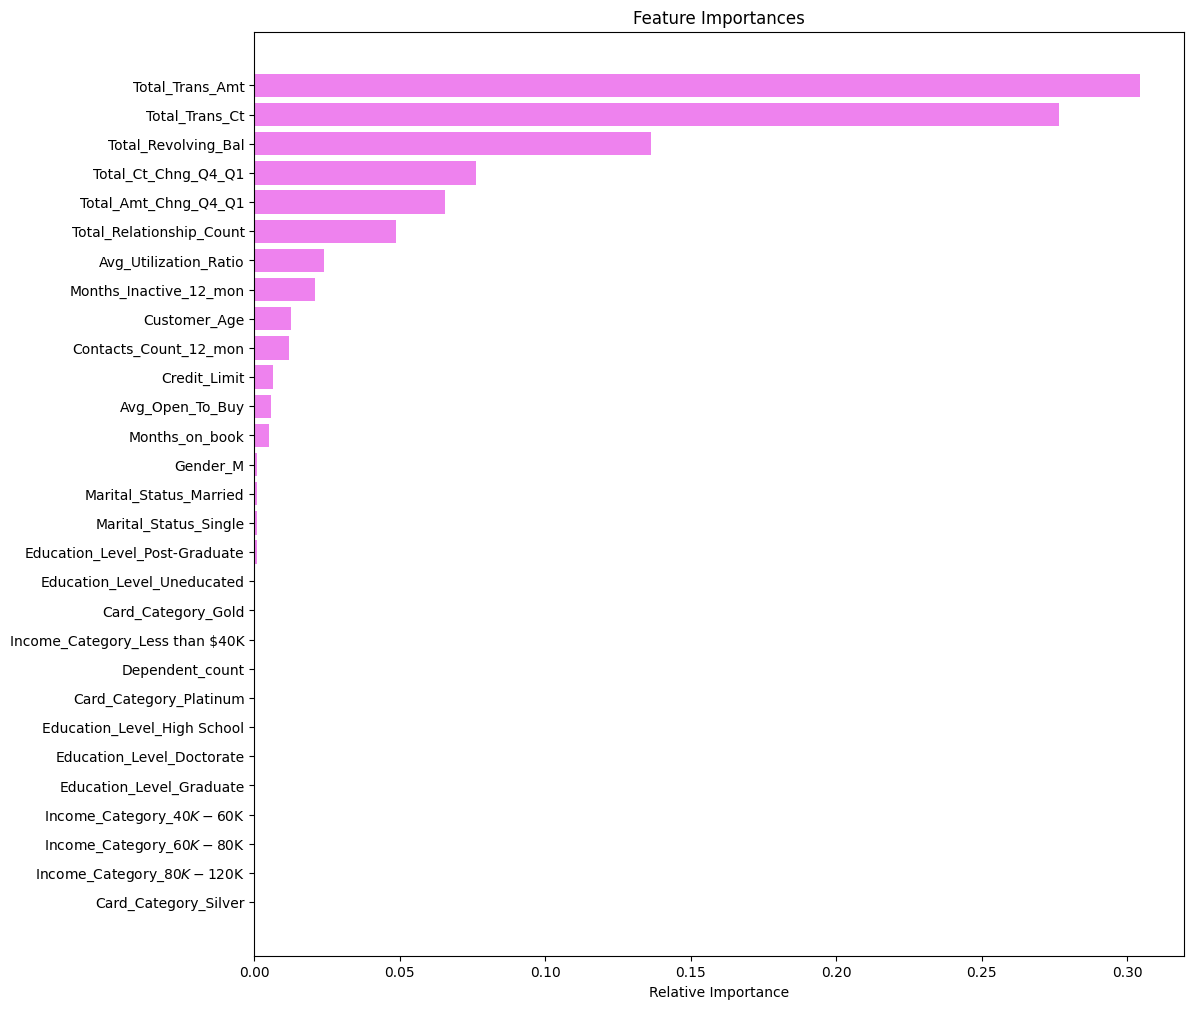%0A)

## Let's use Pipelines to build the final model<a href="#Let&#39;s-use-Pipelines-to-build-the-final-model"
class="anchor-link">¶</a>

-   Let's use pipelines to build the final model

-   We will create 2 different pipelines, one for numerical columns and
    one for categorical columns

-   For numerical columns, we will do missing value imputation as
    pre-processing

-   For categorical columns, we will do one hot encoding and missing
    value imputation as pre-processing

-   We are doing missing value imputation for the whole data, so that if
    there is any missing value in the data in future that can be taken
    care of.

In \[106\]:

    # creating a list of numerical variables
    numerical_features = [
         'Customer_Age', 'Months_on_book',
           'Total_Relationship_Count', 'Months_Inactive_12_mon',
           'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
           'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
           'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

    # creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
    numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


    # creating a list of categorical variables
    categorical_features = ['Gender',
           'Dependent_count', 'Education_Level', 'Marital_Status',
           'Income_Category', 'Card_Category']

    # creating a transformer for categorical variables, which will first apply simple imputer and
    #then do one hot encoding for categorical variables
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]
    )
    # handle_unknown = "ignore", allows model to handle any unknown category in the test data

    # combining categorical transformer and numerical transformer using a column transformer

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numerical_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder="drop",
    )
    # remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features"
    # and "categorical_features"

In \[107\]:

    # Separating target variable and other variables
    X = churn.drop(columns="Attrition_Flag") ##  Complete the code to drop target variabley
    Y= churn["Attrition_Flag"] ##  Complete the code to store target variable

-   Let's first do some basic pre-processing

In \[108\]:

    # CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
    X.drop(["CLIENTNUM"], axis=1, inplace=True)

In \[109\]:

    X["Income_Category"].replace("abc", np.nan, inplace=True) ##  Complete the code to impute the missing values

In \[110\]:

    ## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
    Y.replace("Existing Customer", 0, inplace=True)
    Y.replace("Attrited Customer", 1, inplace=True)

-   Now we already know the best model we need to process with, so we
    don't need to divide data into 3 parts

In \[111\]:

    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.30, random_state=1, stratify=Y
    )
    print(X_train.shape, X_test.shape)

    (7088, 19) (3039, 19)

In \[112\]:

    # Creating new pipeline with best parameters
    model = Pipeline(
        steps=[
            ("pre", preprocessor),
            (
                "XGB",
                XGBClassifier(
                    random_state=1,
                    n_estimators=50,
                    scale_pos_weight=10,
                    subsample=1,
                    learning_rate=0.05,
                    gamma=0,
                    eval_metric="logloss",
                    reg_lambda=10,
                    max_depth=1,
                ),
            ),
        ]
    )
     ## Complete the code to create pipeline for the best model

In \[113\]:

    model.fit(X_train, y_train) ##  Complete the code to fit the Model obtained from above step

Out\[113\]:

    Pipeline(steps=[('pre',
                     ColumnTransformer(transformers=[('num',
                                                      Pipeline(steps=[('imputer',
                                                                       SimpleImputer(strategy='median'))]),
                                                      ['Customer_Age',
                                                       'Months_on_book',
                                                       'Total_Relationship_Count',
                                                       'Months_Inactive_12_mon',
                                                       'Contacts_Count_12_mon',
                                                       'Credit_Limit',
                                                       'Total_Revolving_Bal',
                                                       'Avg_Open_To_Buy',
                                                       'Total_Amt_Chng_Q4_Q1',
                                                       'Total_Trans_Amt',
                                                       'Total_Trans_Ct',
                                                       'To...
                                   feature_types=None, gamma=0, gpu_id=None,
                                   grow_policy=None, importance_type=None,
                                   interaction_constraints=None, learning_rate=0.05,
                                   max_bin=None, max_cat_threshold=None,
                                   max_cat_to_onehot=None, max_delta_step=None,
                                   max_depth=1, max_leaves=None,
                                   min_child_weight=None, missing=nan,
                                   monotone_constraints=None, n_estimators=50,
                                   n_jobs=None, num_parallel_tree=None,
                                   predictor=None, random_state=1, ...))])

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

Pipeline

    Pipeline(steps=[('pre',
                     ColumnTransformer(transformers=[('num',
                                                      Pipeline(steps=[('imputer',
                                                                       SimpleImputer(strategy='median'))]),
                                                      ['Customer_Age',
                                                       'Months_on_book',
                                                       'Total_Relationship_Count',
                                                       'Months_Inactive_12_mon',
                                                       'Contacts_Count_12_mon',
                                                       'Credit_Limit',
                                                       'Total_Revolving_Bal',
                                                       'Avg_Open_To_Buy',
                                                       'Total_Amt_Chng_Q4_Q1',
                                                       'Total_Trans_Amt',
                                                       'Total_Trans_Ct',
                                                       'To...
                                   feature_types=None, gamma=0, gpu_id=None,
                                   grow_policy=None, importance_type=None,
                                   interaction_constraints=None, learning_rate=0.05,
                                   max_bin=None, max_cat_threshold=None,
                                   max_cat_to_onehot=None, max_delta_step=None,
                                   max_depth=1, max_leaves=None,
                                   min_child_weight=None, missing=nan,
                                   monotone_constraints=None, n_estimators=50,
                                   n_jobs=None, num_parallel_tree=None,
                                   predictor=None, random_state=1, ...))])

pre: ColumnTransformer

    ColumnTransformer(transformers=[('num',
                                     Pipeline(steps=[('imputer',
                                                      SimpleImputer(strategy='median'))]),
                                     ['Customer_Age', 'Months_on_book',
                                      'Total_Relationship_Count',
                                      'Months_Inactive_12_mon',
                                      'Contacts_Count_12_mon', 'Credit_Limit',
                                      'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                      'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                      'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                      'Avg_Utilization_Ratio']),
                                    ('cat',
                                     Pipeline(steps=[('imputer',
                                                      SimpleImputer(strategy='most_frequent')),
                                                     ('onehot',
                                                      OneHotEncoder(handle_unknown='ignore'))]),
                                     ['Gender', 'Dependent_count',
                                      'Education_Level', 'Marital_Status',
                                      'Income_Category', 'Card_Category'])])

num

    ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

SimpleImputer

    SimpleImputer(strategy='median')

cat

    ['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

SimpleImputer

    SimpleImputer(strategy='most_frequent')

OneHotEncoder

    OneHotEncoder(handle_unknown='ignore')

XGBClassifier

    XGBClassifier(base_score=None, booster=None, callbacks=None,
                  colsample_bylevel=None, colsample_bynode=None,
                  colsample_bytree=None, early_stopping_rounds=None,
                  enable_categorical=False, eval_metric='logloss',
                  feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
                  importance_type=None, interaction_constraints=None,
                  learning_rate=0.05, max_bin=None, max_cat_threshold=None,
                  max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
                  max_leaves=None, min_child_weight=None, missing=nan,
                  monotone_constraints=None, n_estimators=50, n_jobs=None,
                  num_parallel_tree=None, predictor=None, random_state=1, ...)

# Business Insights and Conclusions<a href="#Business-Insights-and-Conclusions" class="anchor-link">¶</a>

We analyzed the "personal loan campaign" using different techniqueslike
ada boost gradient boost model to build a predictive model. The model
built can be used to predict if a customer is going to renouce their
card or not. From the model after using different model built we came
out with a Accuracy of 0.948, a Recall of 0.976, a precision of 0.754
and a F1 of 0.857 from gbm model We verified the fact that how much less
data preparation is needed for gradient boost and such a simple model
gave good results. total trans amount and the total, trans credit and
also total revolving bal are the most important variable in predicting
the customers that will purchase a loan. We established the importance
of hyper-parameters/ pruning to reduce overfitting. Recommendations
According to the importance feature and eda performed -

a\) the married customer has the highest number in the flag

b\) the customer earning less than 40k are more also

It is observed that the relation between total trans amount and the
total trans credit and also total revolving bal play major part in the
data

------------------------------------------------------------------------